In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD

from sklearn.cross_decomposition import CCA

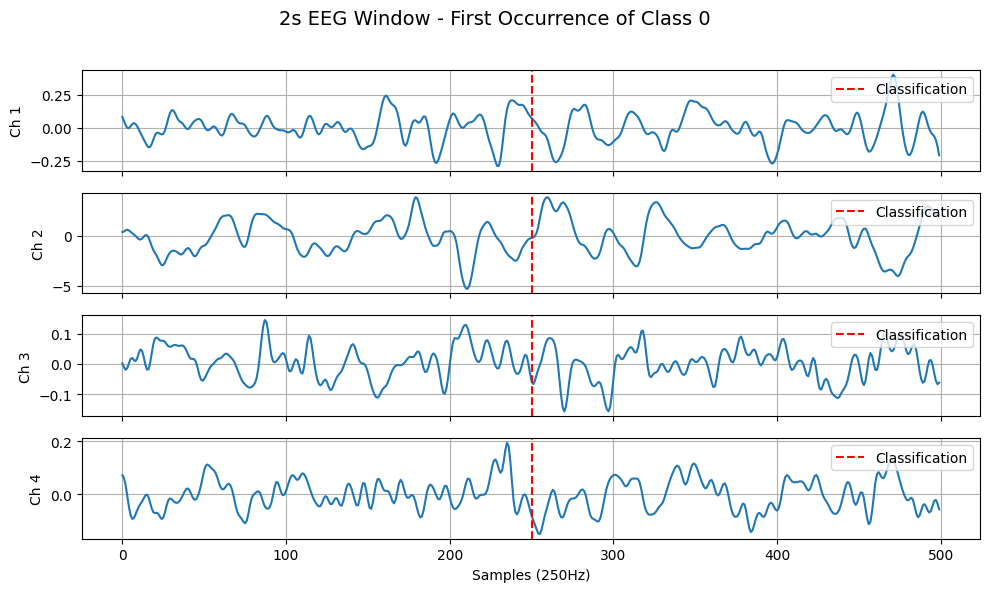

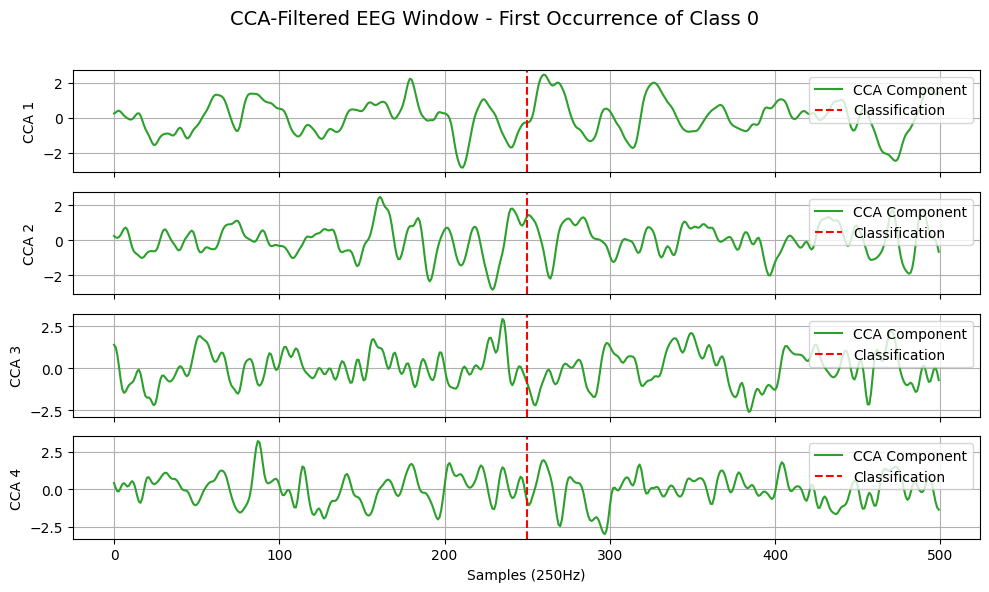

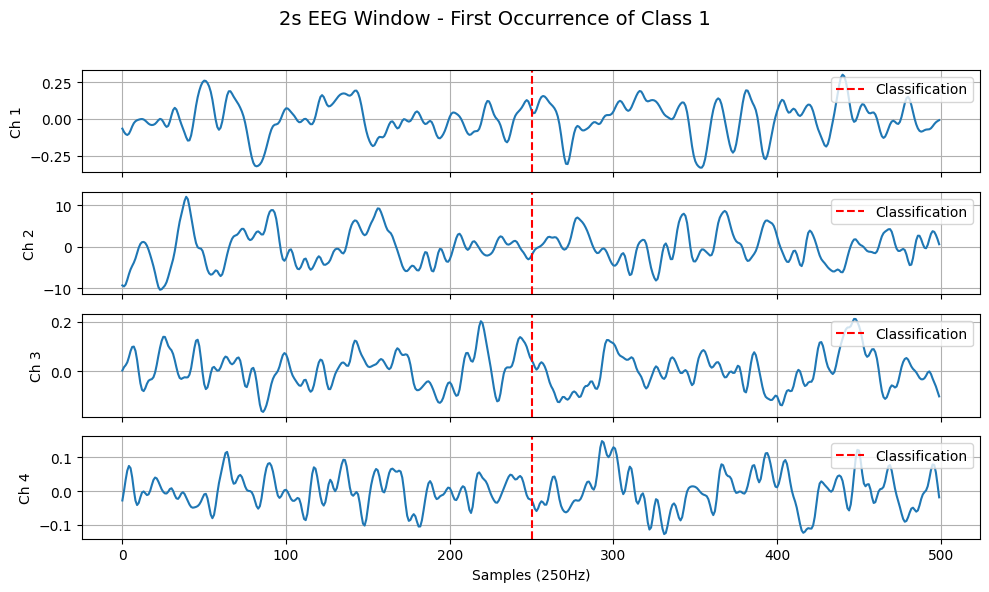

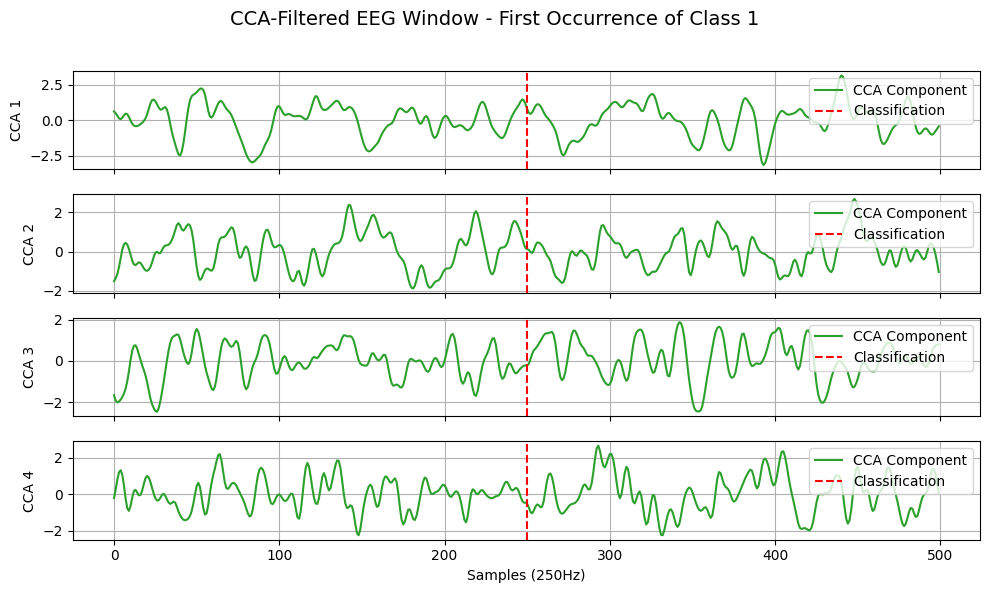

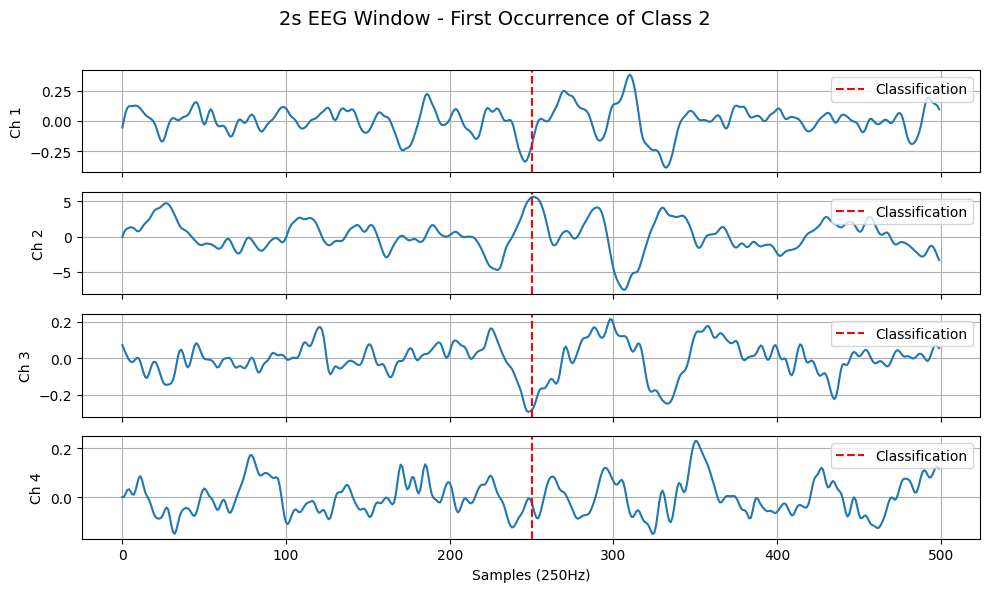

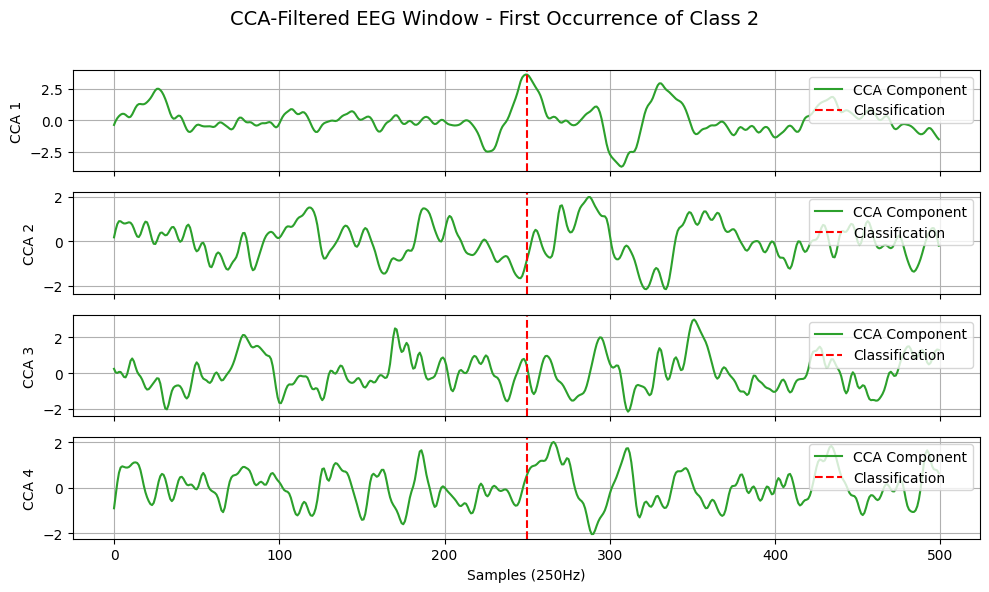

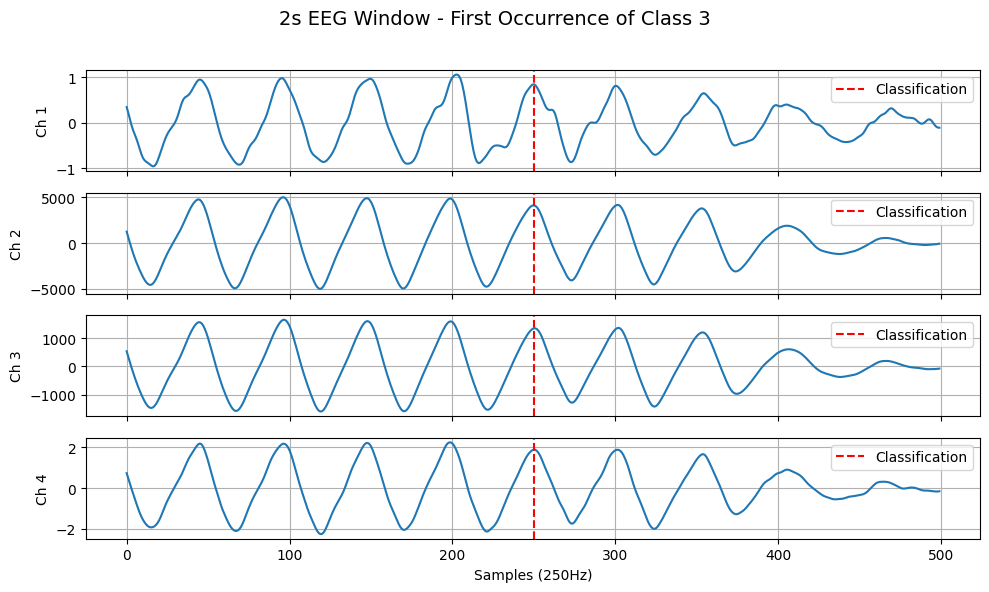

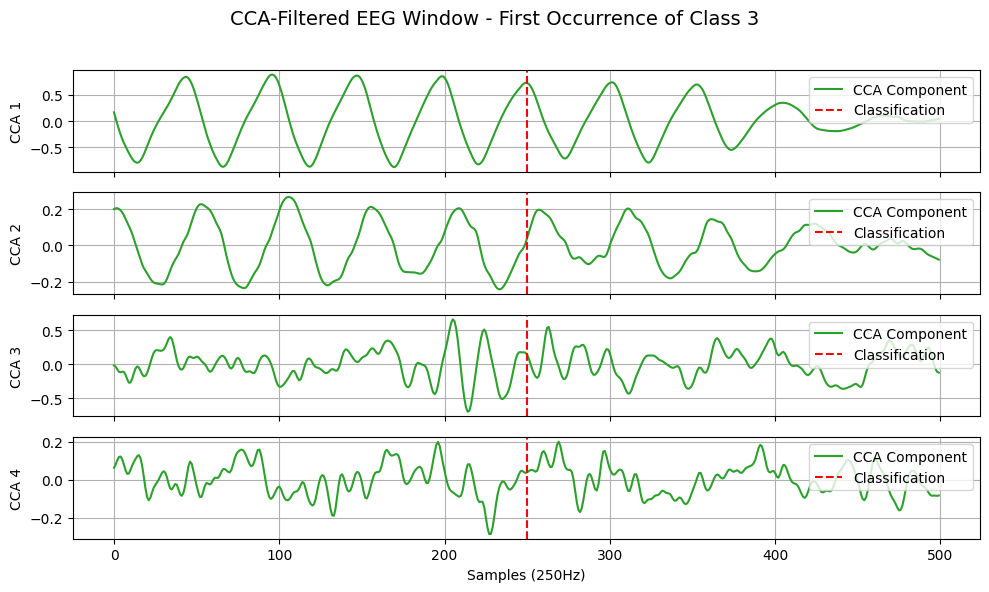

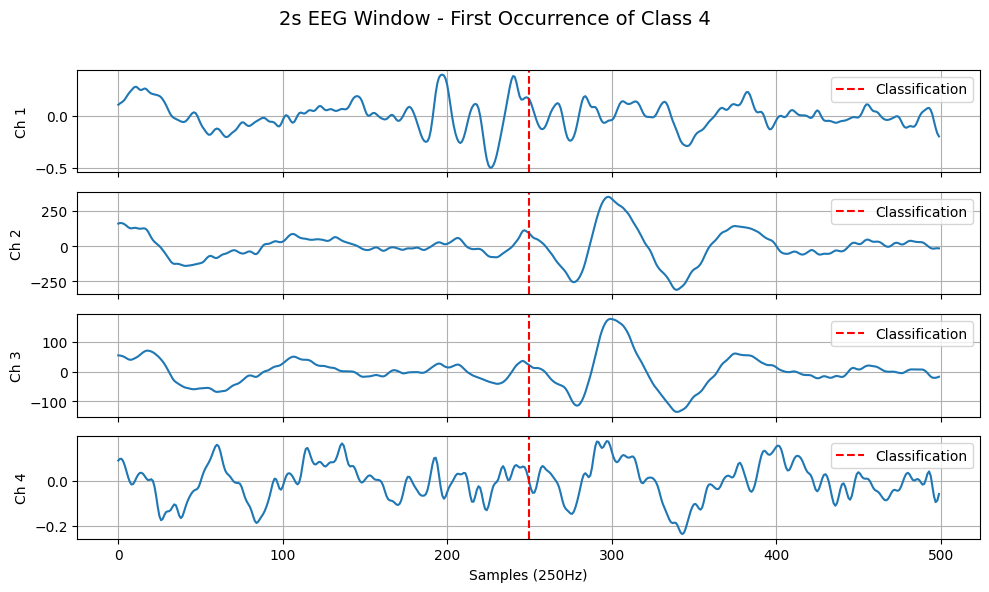

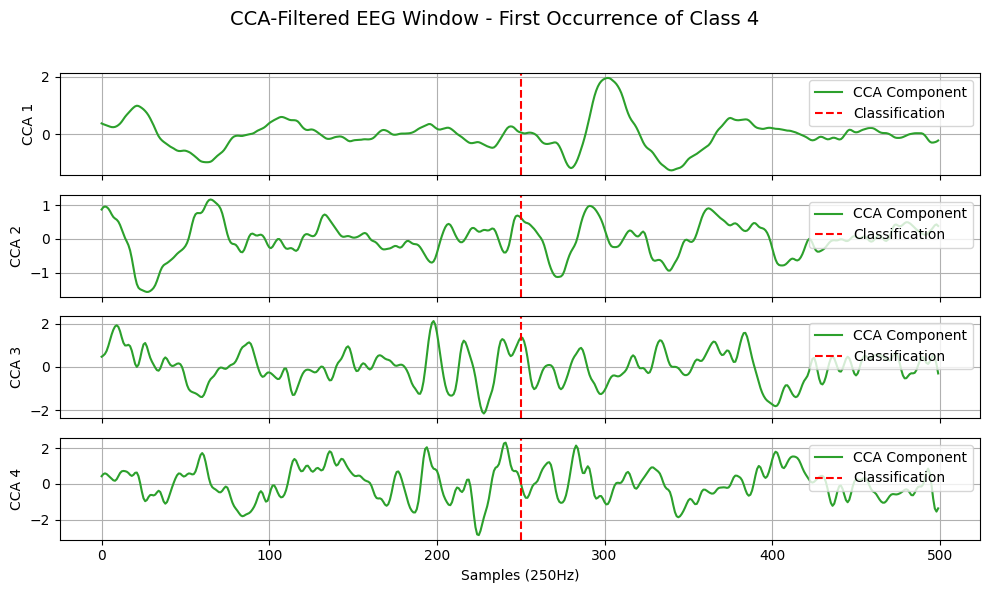

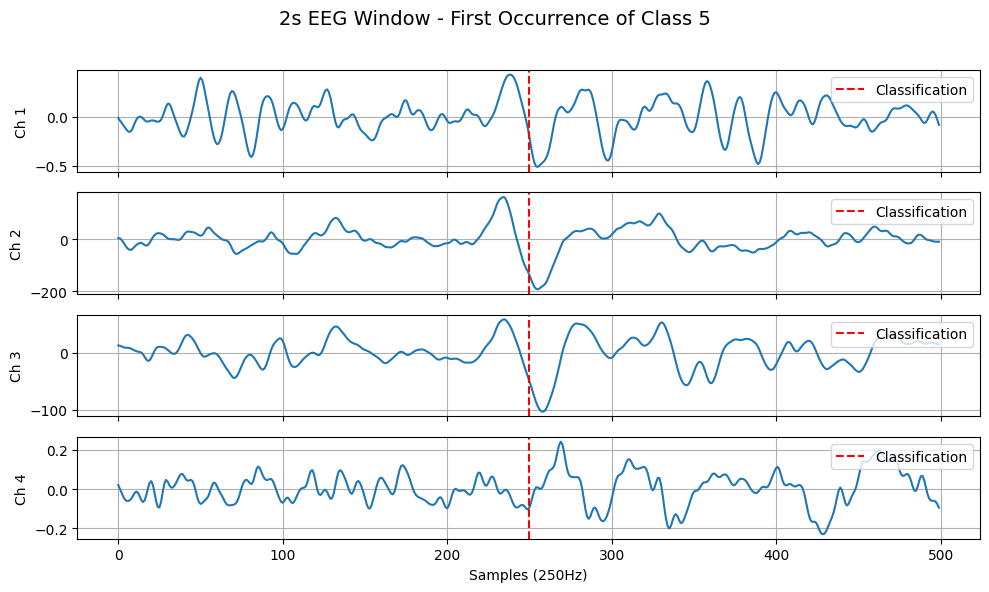

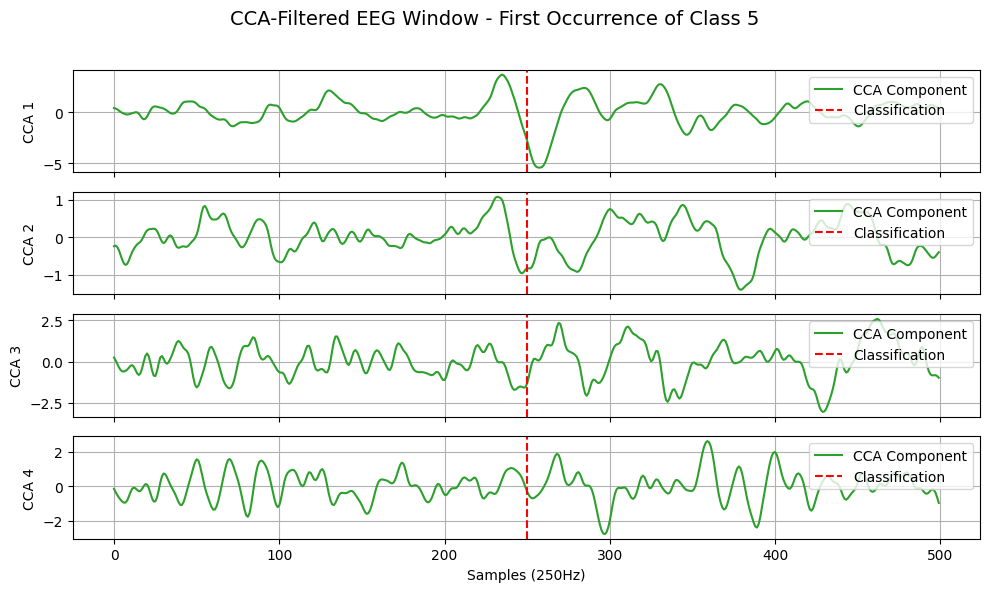

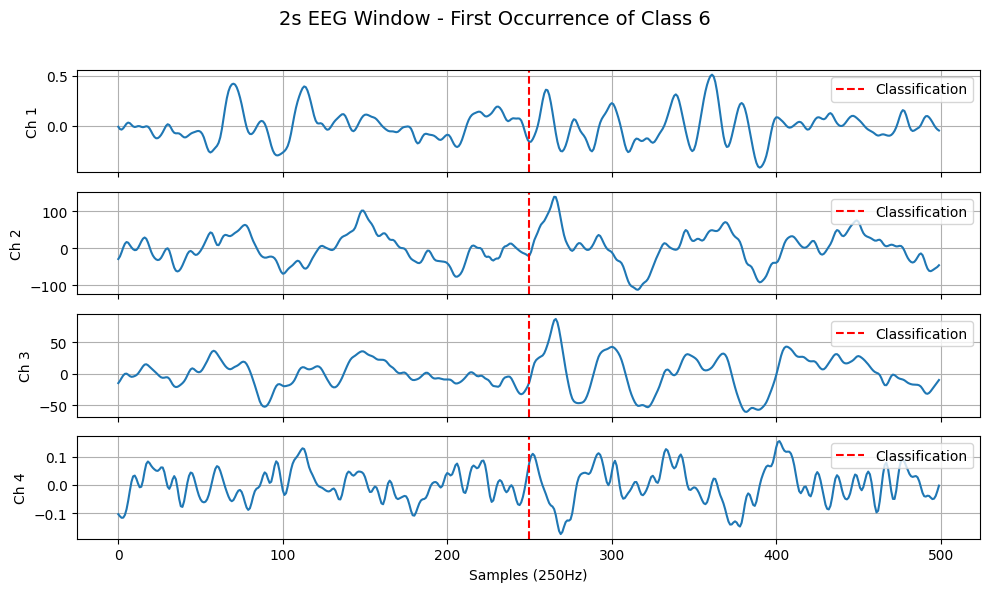

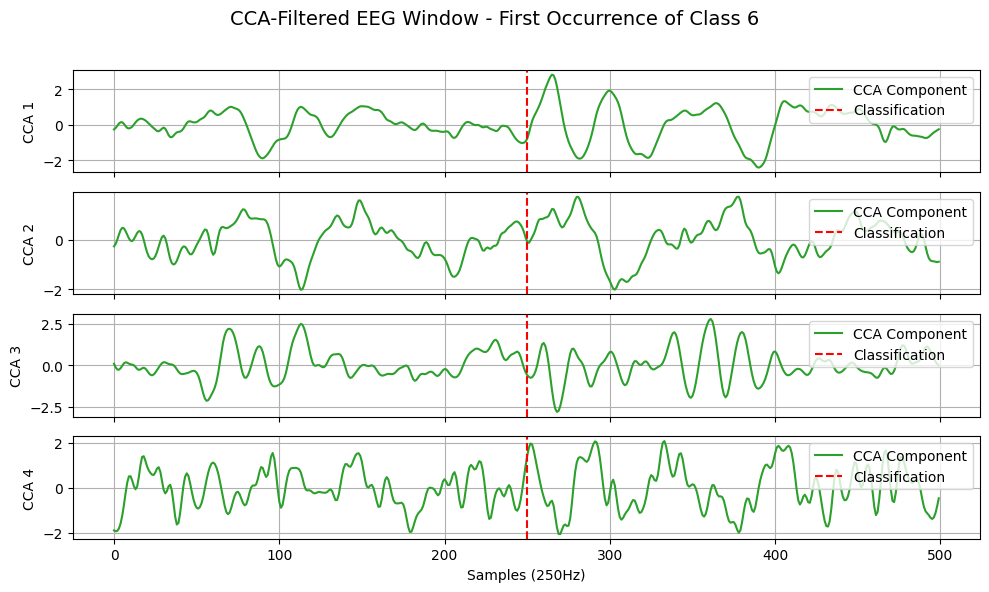

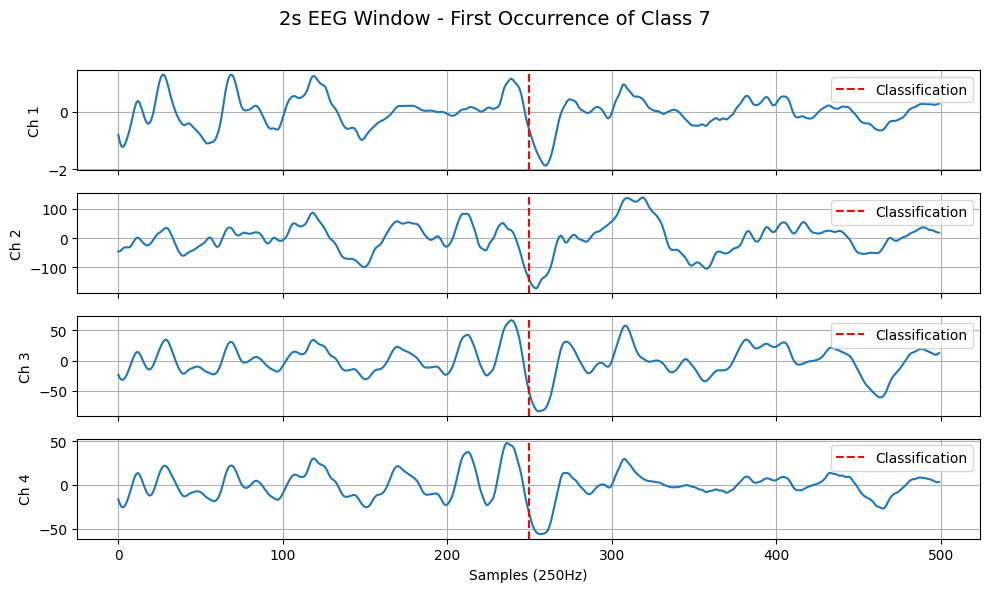

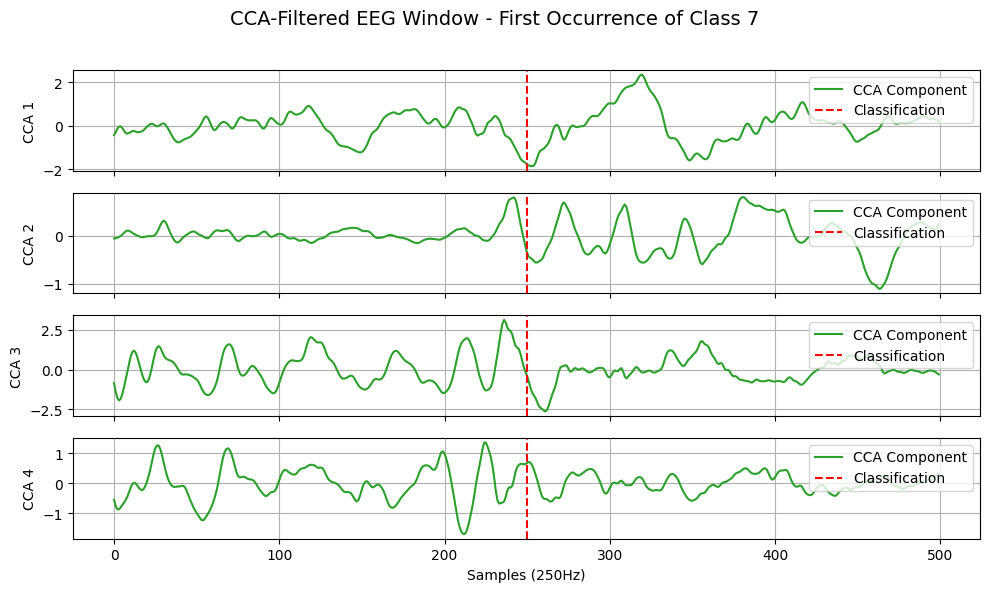

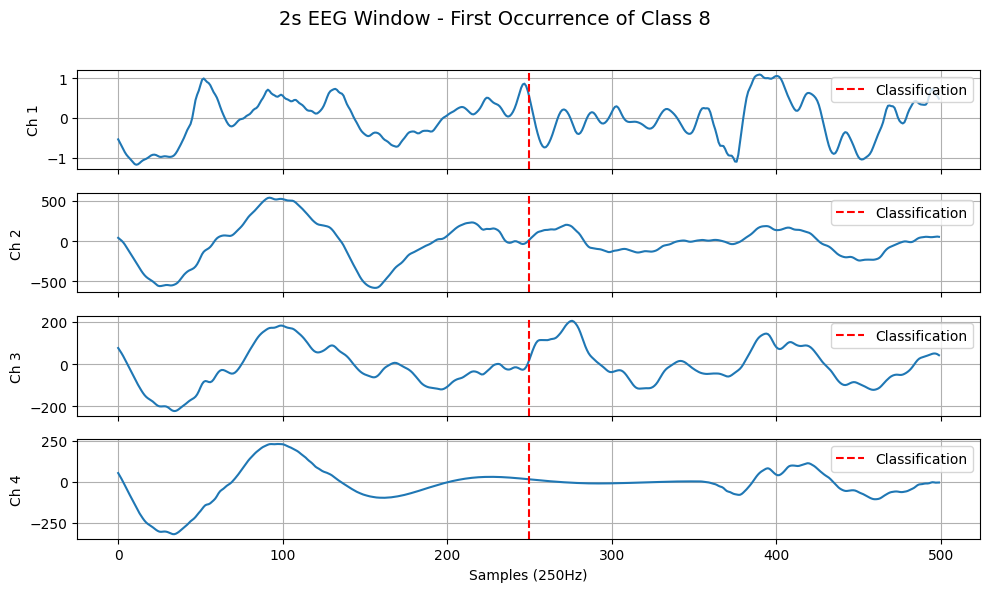

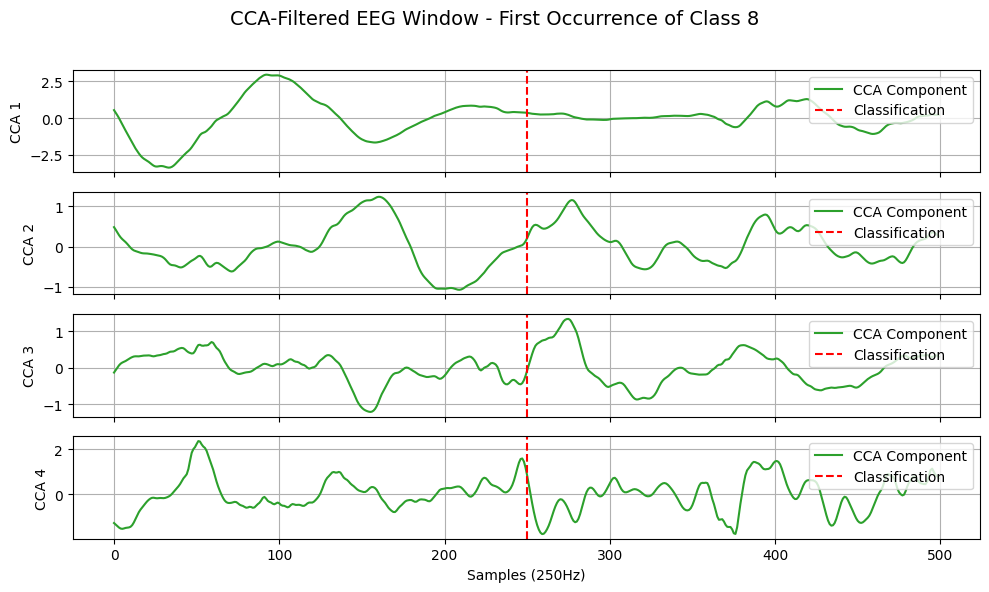

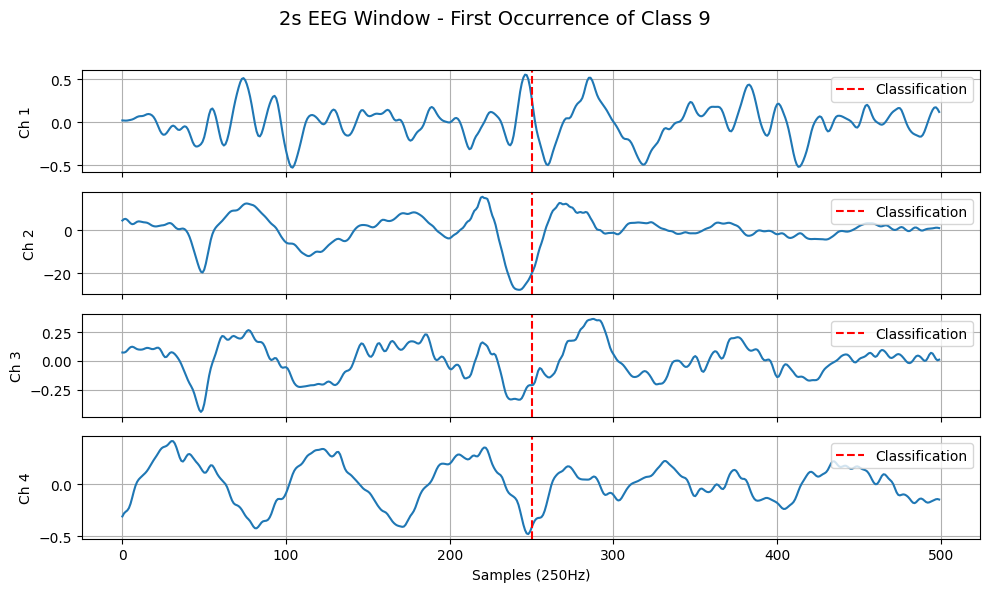

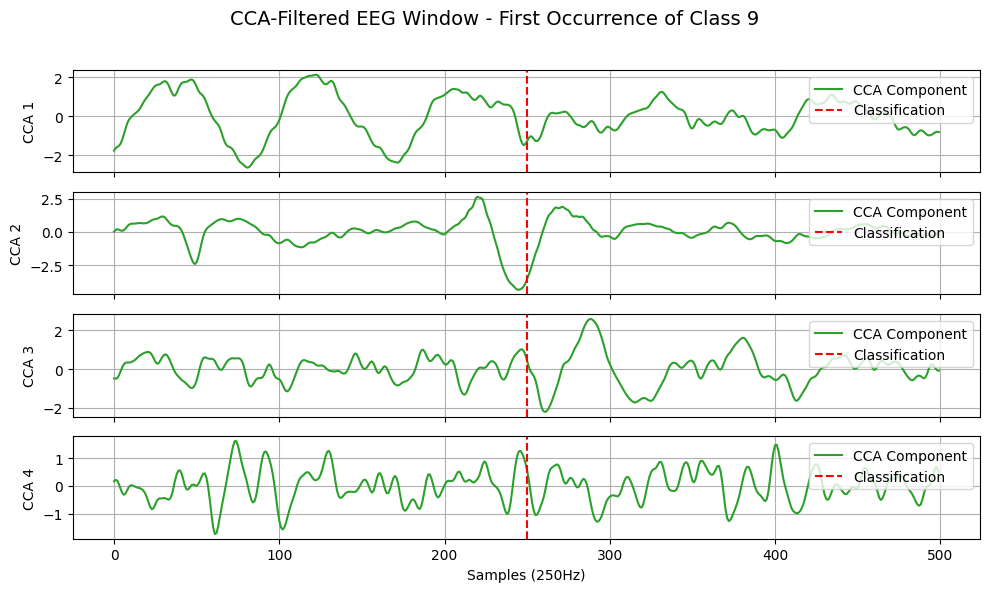

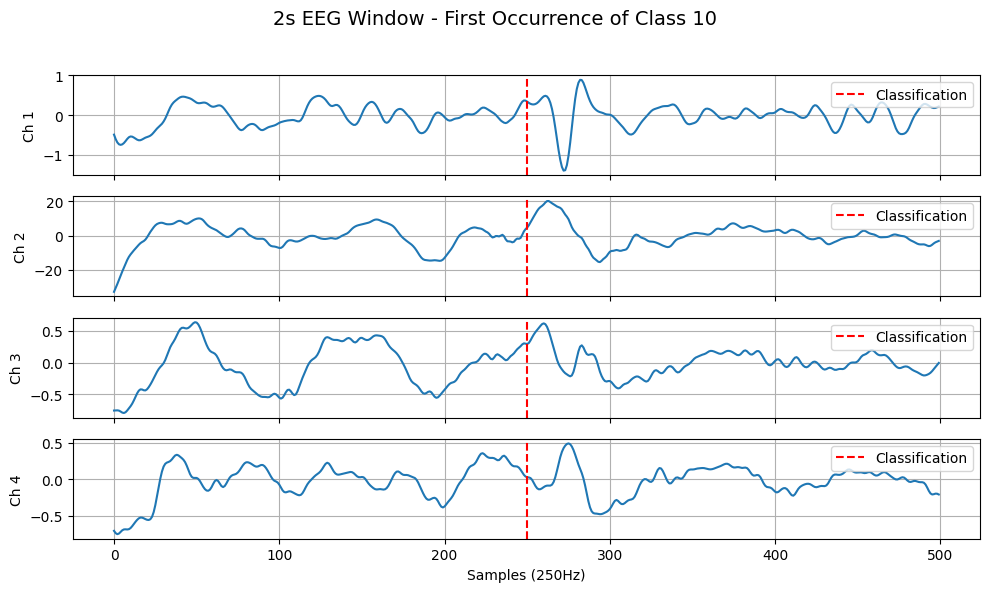

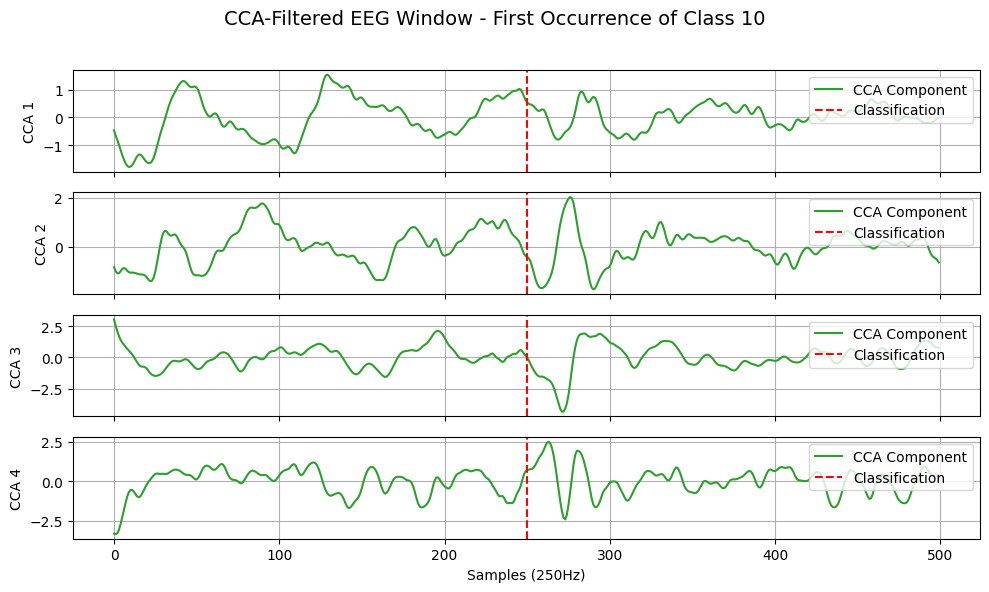

In [9]:
# Load files
classification_path = "TrainingData/training_data.csv"
data_path = "TrainingData/combined_data.csv"

classification = pd.read_csv(classification_path).values.astype(np.int64)
data = pd.read_csv(data_path).values.astype(np.float32)

# EEG & class info
channel_data = data[:, :4]
classifications_list = [0,1,2,3,4,5,6,7,8,9,10]

# Settings
sampling_rate = 250
window_size = sampling_rate * 2  # 2 seconds
half_window = window_size // 2

# Plot each class
for class_id in classifications_list:
    matches = classification[classification[:, 0] == class_id]
    if len(matches) == 0:
        print(f"Class {class_id} not found in classification data.")
        continue

    center_idx = matches[12, 1]
    start = max(0, center_idx - half_window)
    end = min(len(data), center_idx + half_window)
    window = channel_data[start:end]
    

    
    #max_abs = np.max(np.abs(window))
    #window = window / max_abs if max_abs != 0 else window

    # Plot
    fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    fig.suptitle(f"2s EEG Window - First Occurrence of Class {class_id}", fontsize=14)

    for ch in range(4):
        axes[ch].plot(window[:, ch], color='tab:blue')
        axes[ch].axvline(x=half_window, color='red', linestyle='--', label='Classification')  # vertical line
        axes[ch].set_ylabel(f"Ch {ch+1}")
        axes[ch].grid(True)
        axes[ch].legend(loc="upper right")

    axes[-1].set_xlabel("Samples (250Hz)")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # --- Apply CCA ---
    X = window[:, :4]             # First 4 EEG channels
    Y = np.roll(X, shift=1, axis=0)  # Time-lagged version (shifted by 1 sample)
    cca = CCA(n_components=4)
    X_c, Y_c = cca.fit_transform(X, Y)
    cca_output = X_c  # Use canonical components as cleaned signals

    # --- Plot ---
    fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    fig.suptitle(f"CCA-Filtered EEG Window - First Occurrence of Class {class_id}", fontsize=14)

    for ch in range(4):
        axes[ch].plot(cca_output[:, ch], color='tab:green', label='CCA Component')
        axes[ch].axvline(half_window, color='red', linestyle='--', label='Classification')
        axes[ch].set_ylabel(f"CCA {ch+1}")
        axes[ch].grid(True)
        axes[ch].legend(loc="upper right")

    axes[-1].set_xlabel("Samples (250Hz)")
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

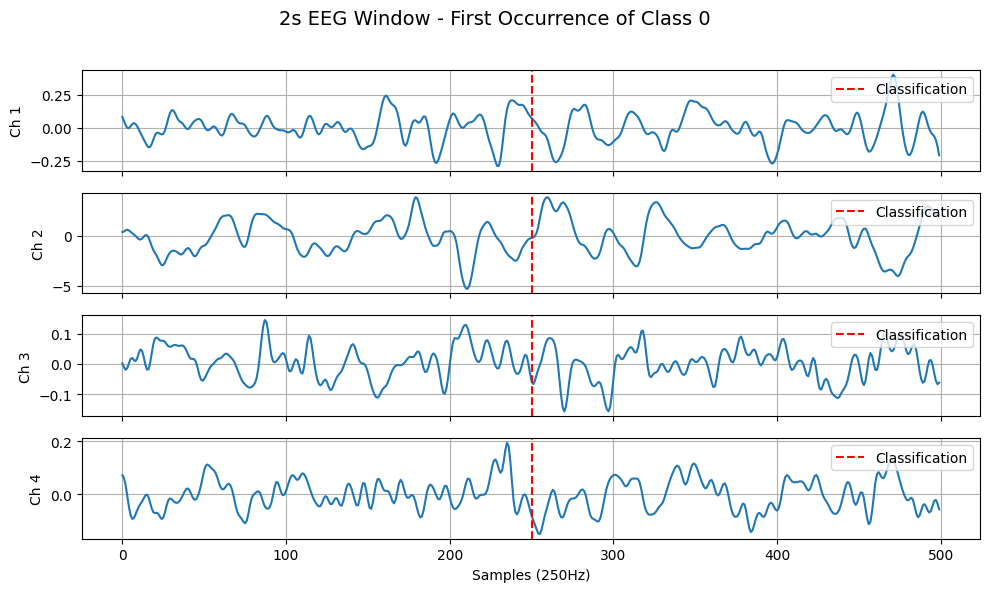

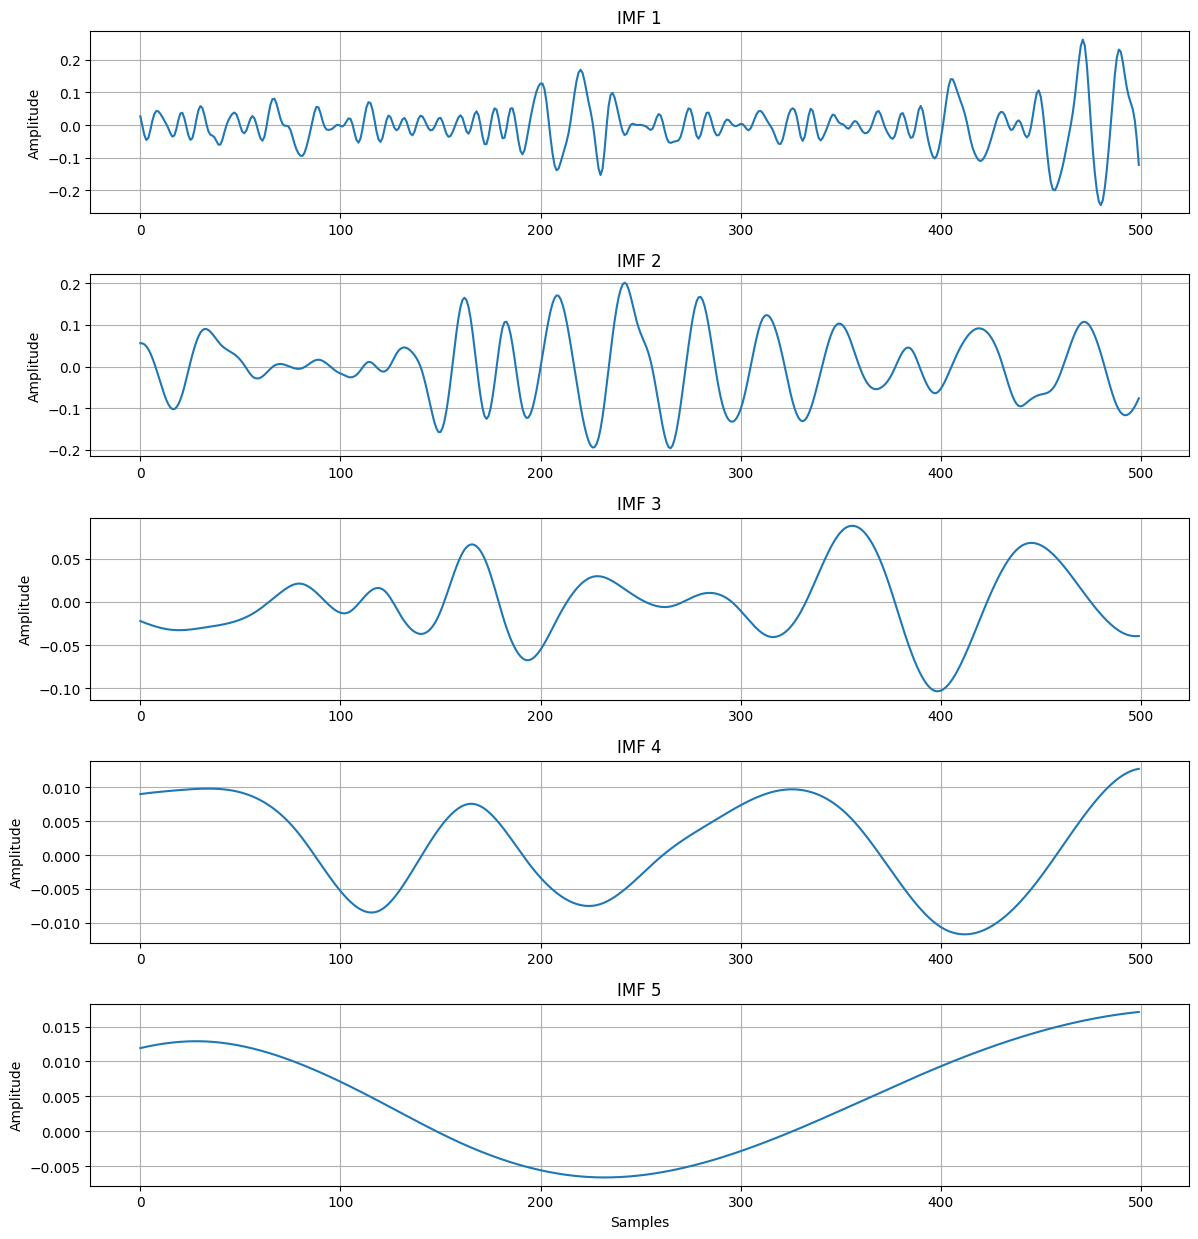

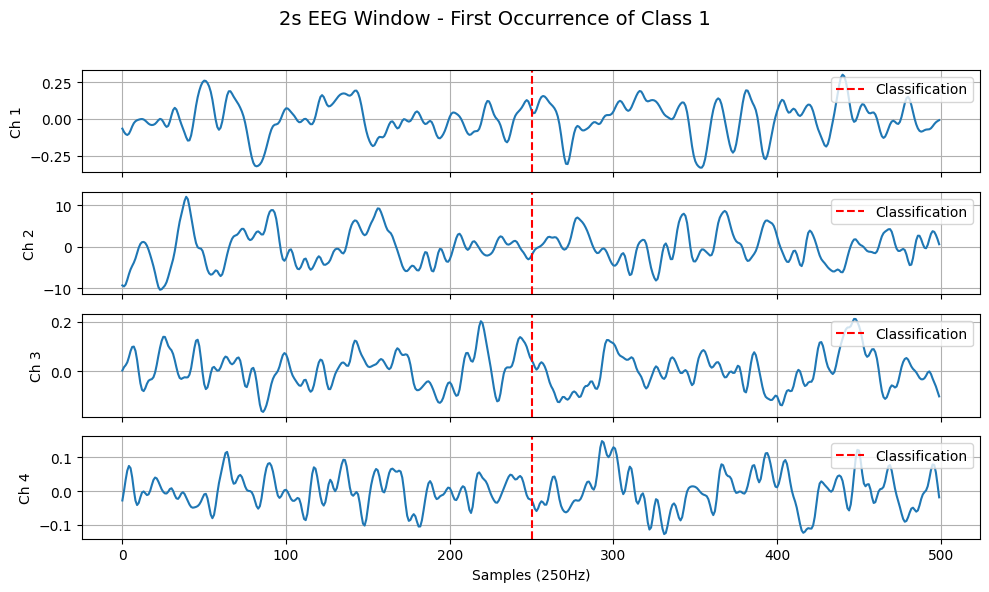

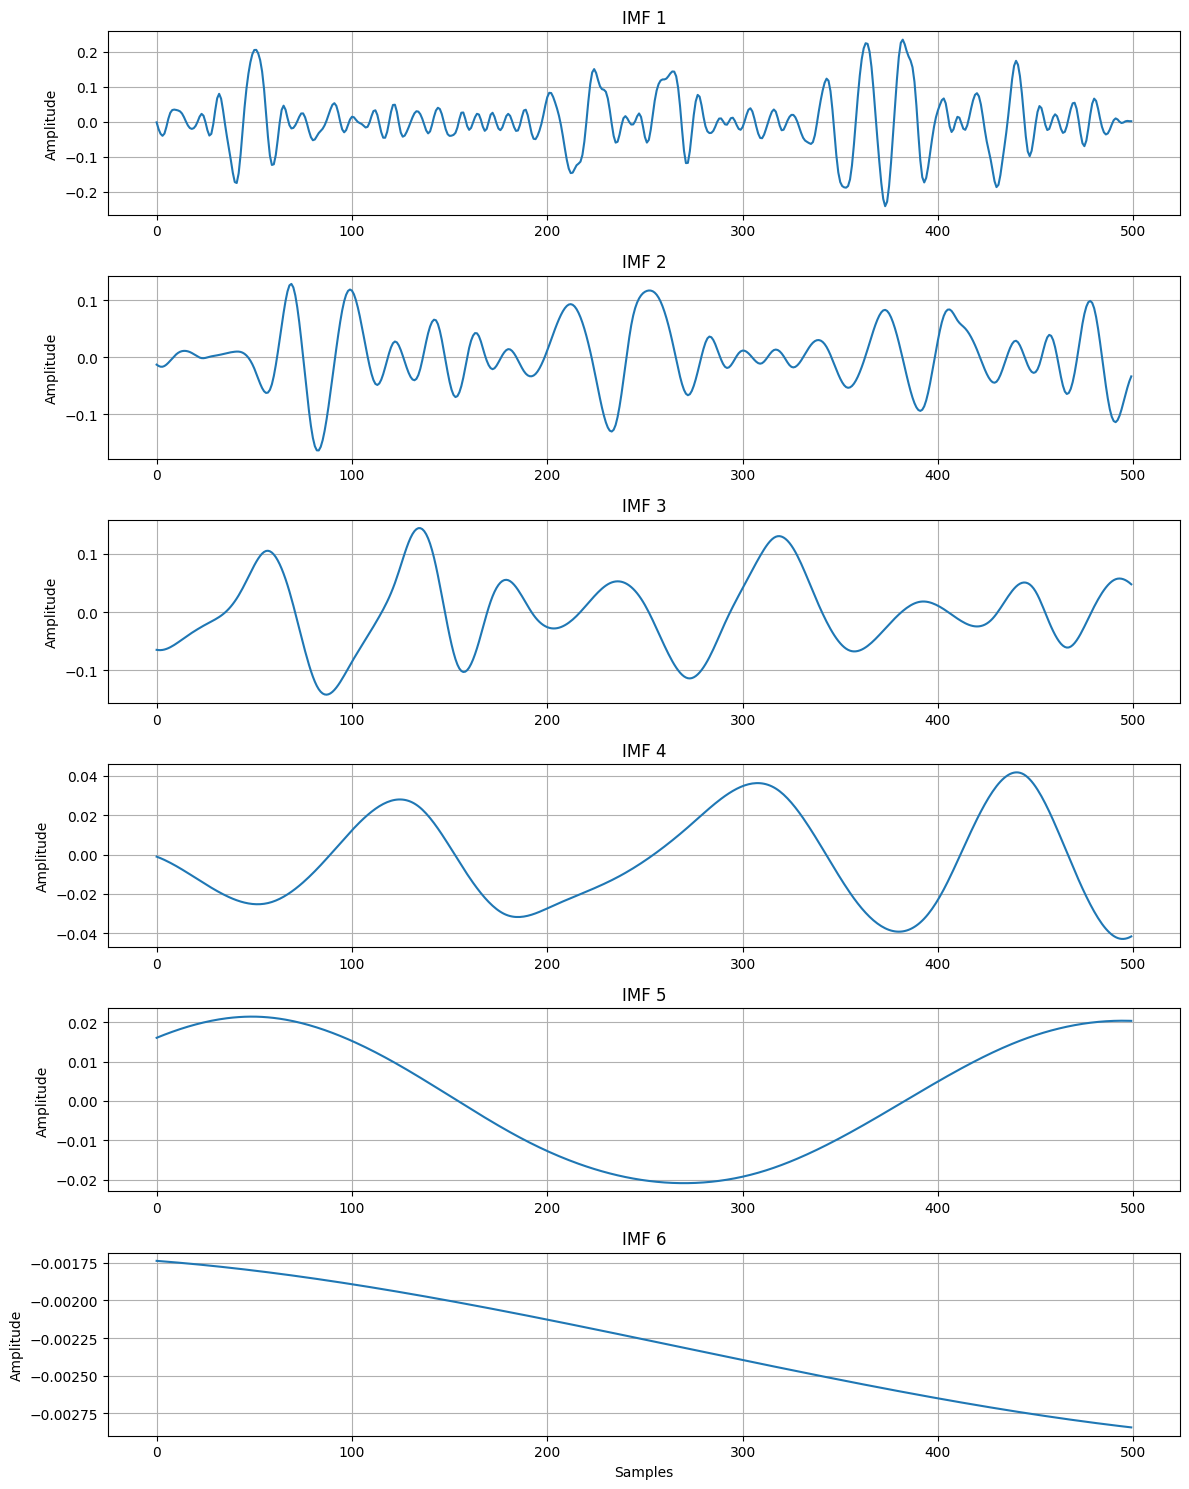

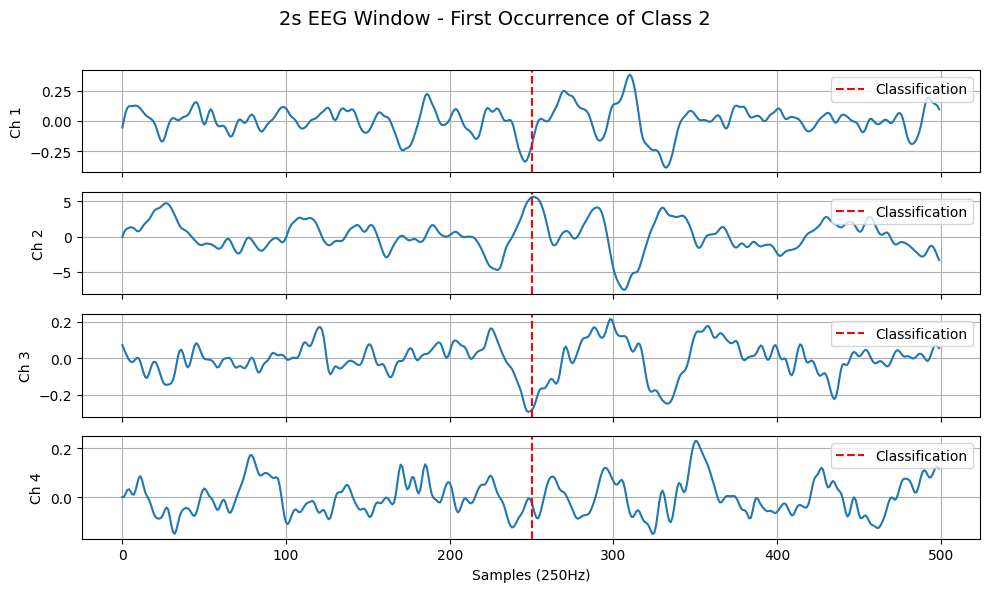

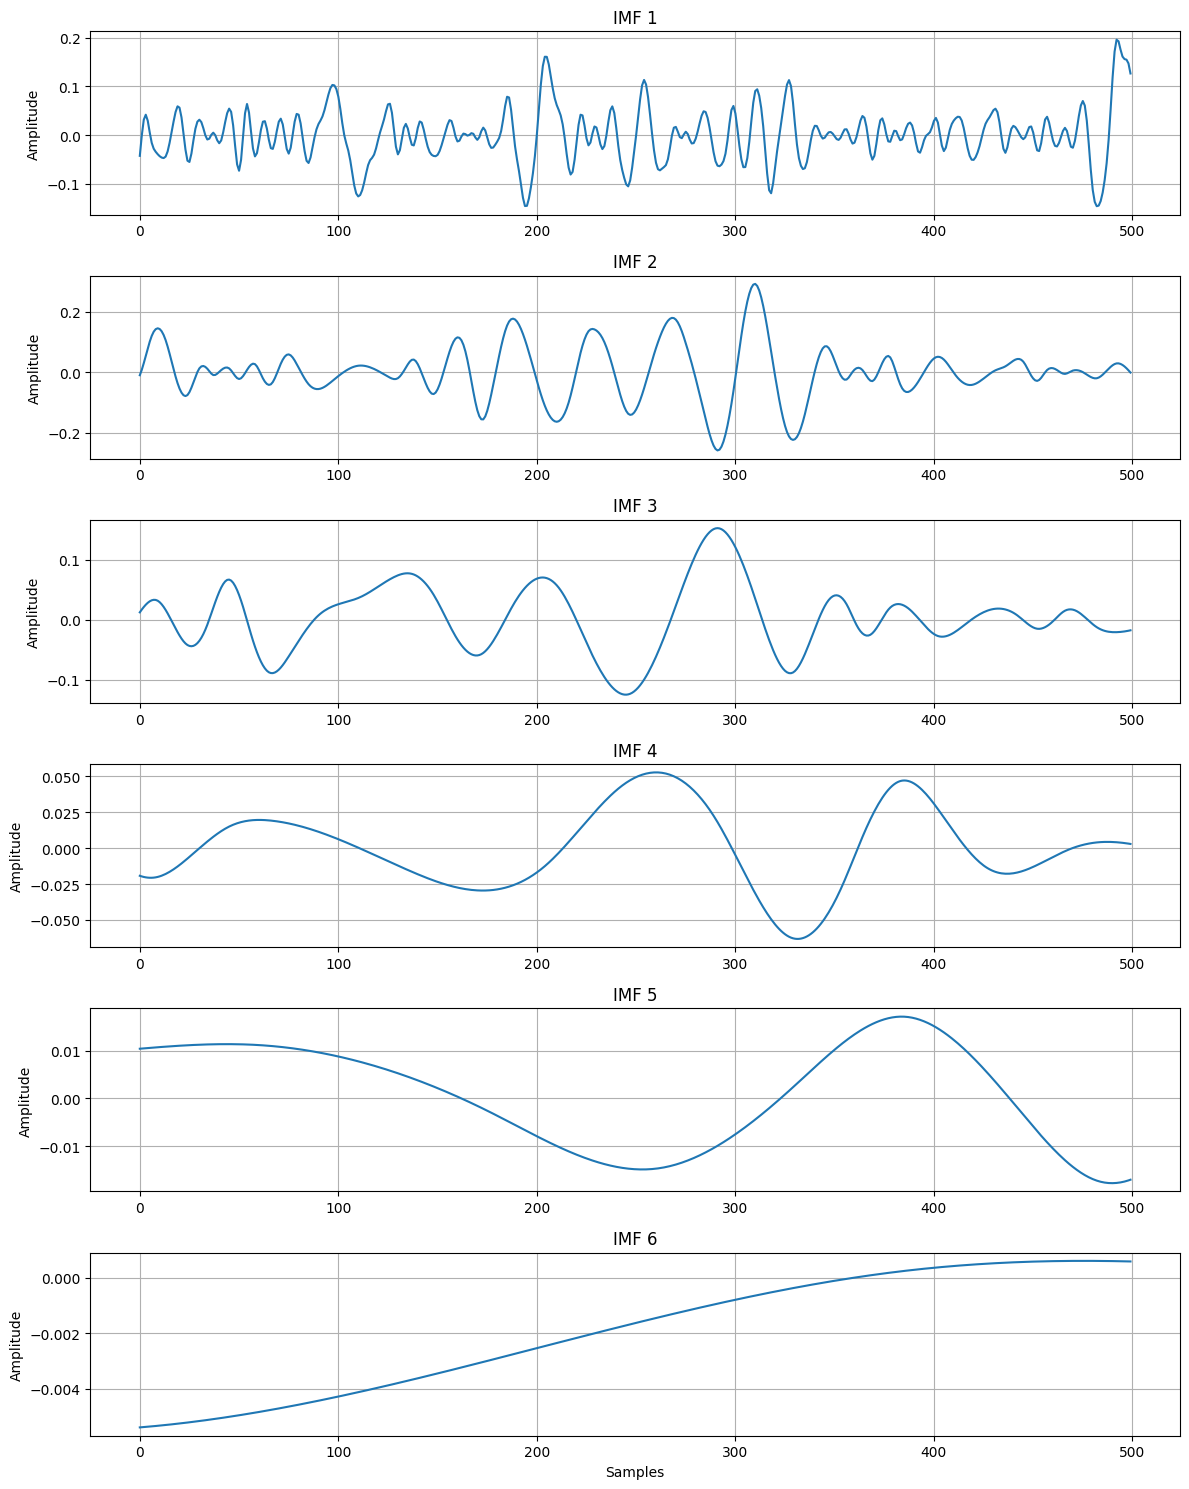

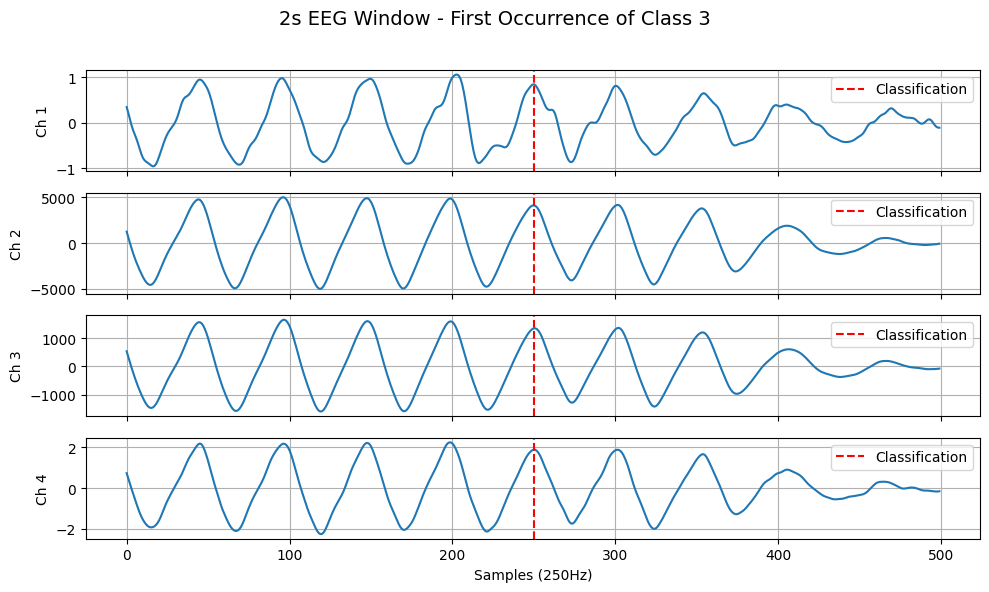

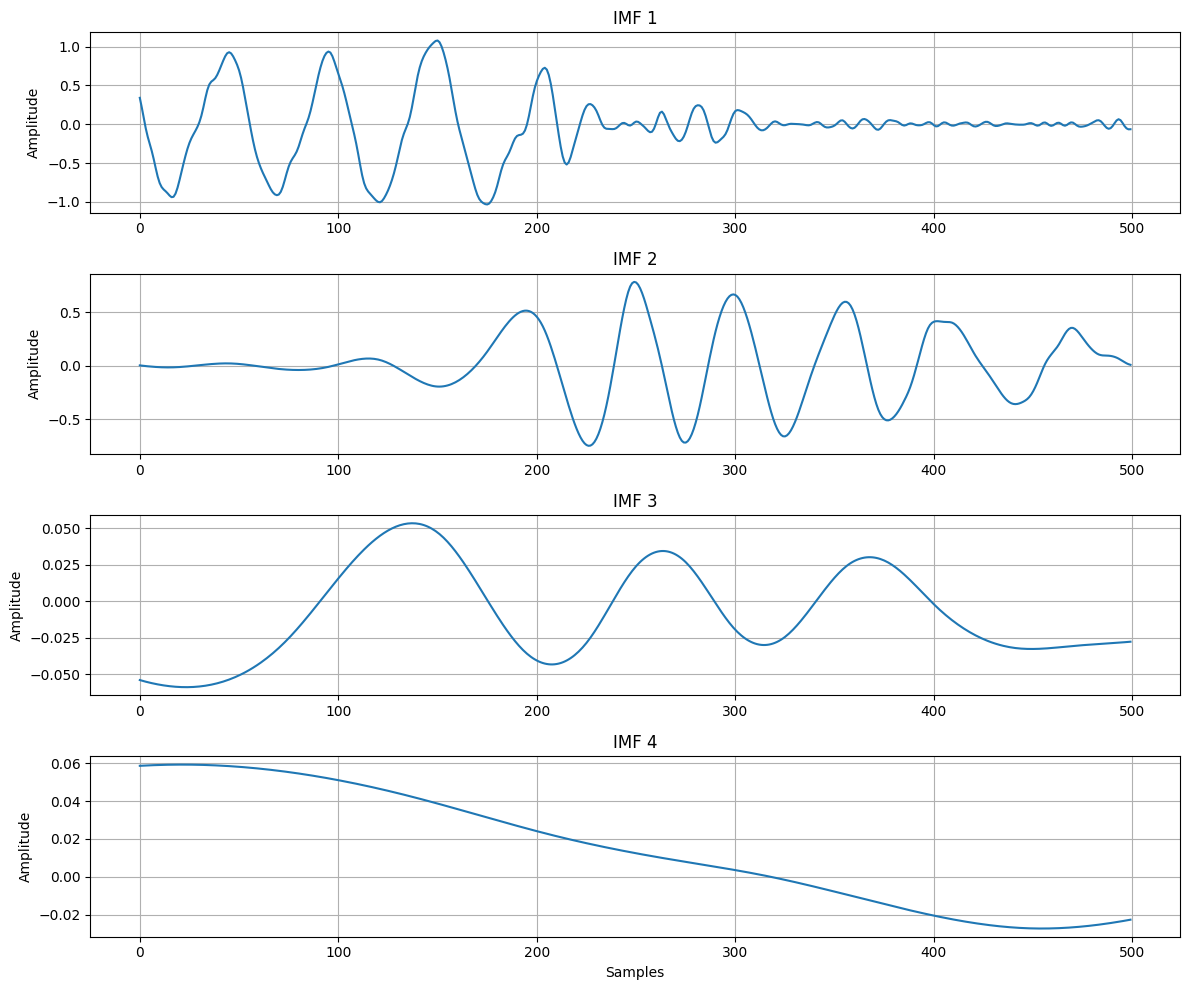

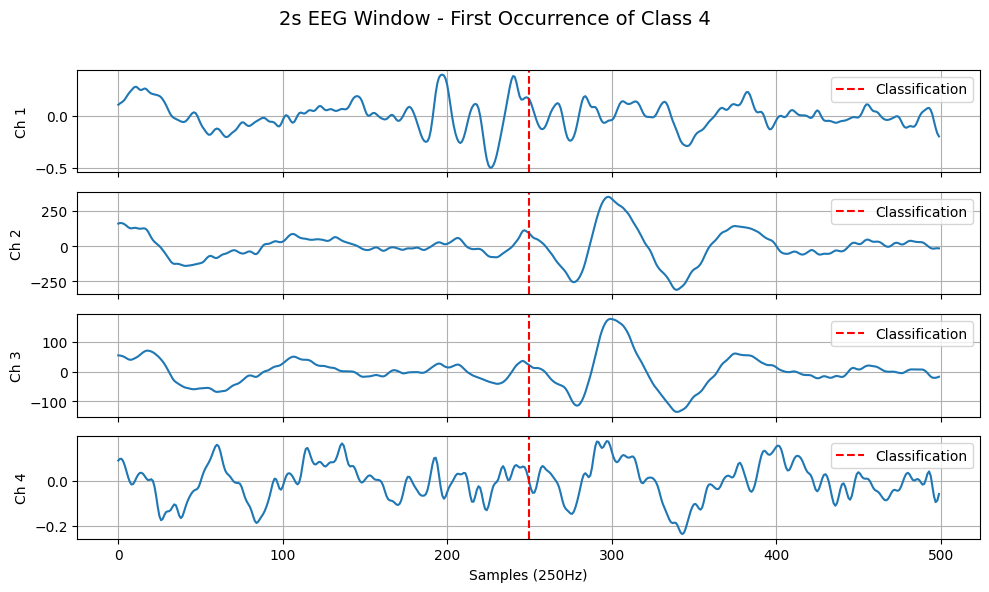

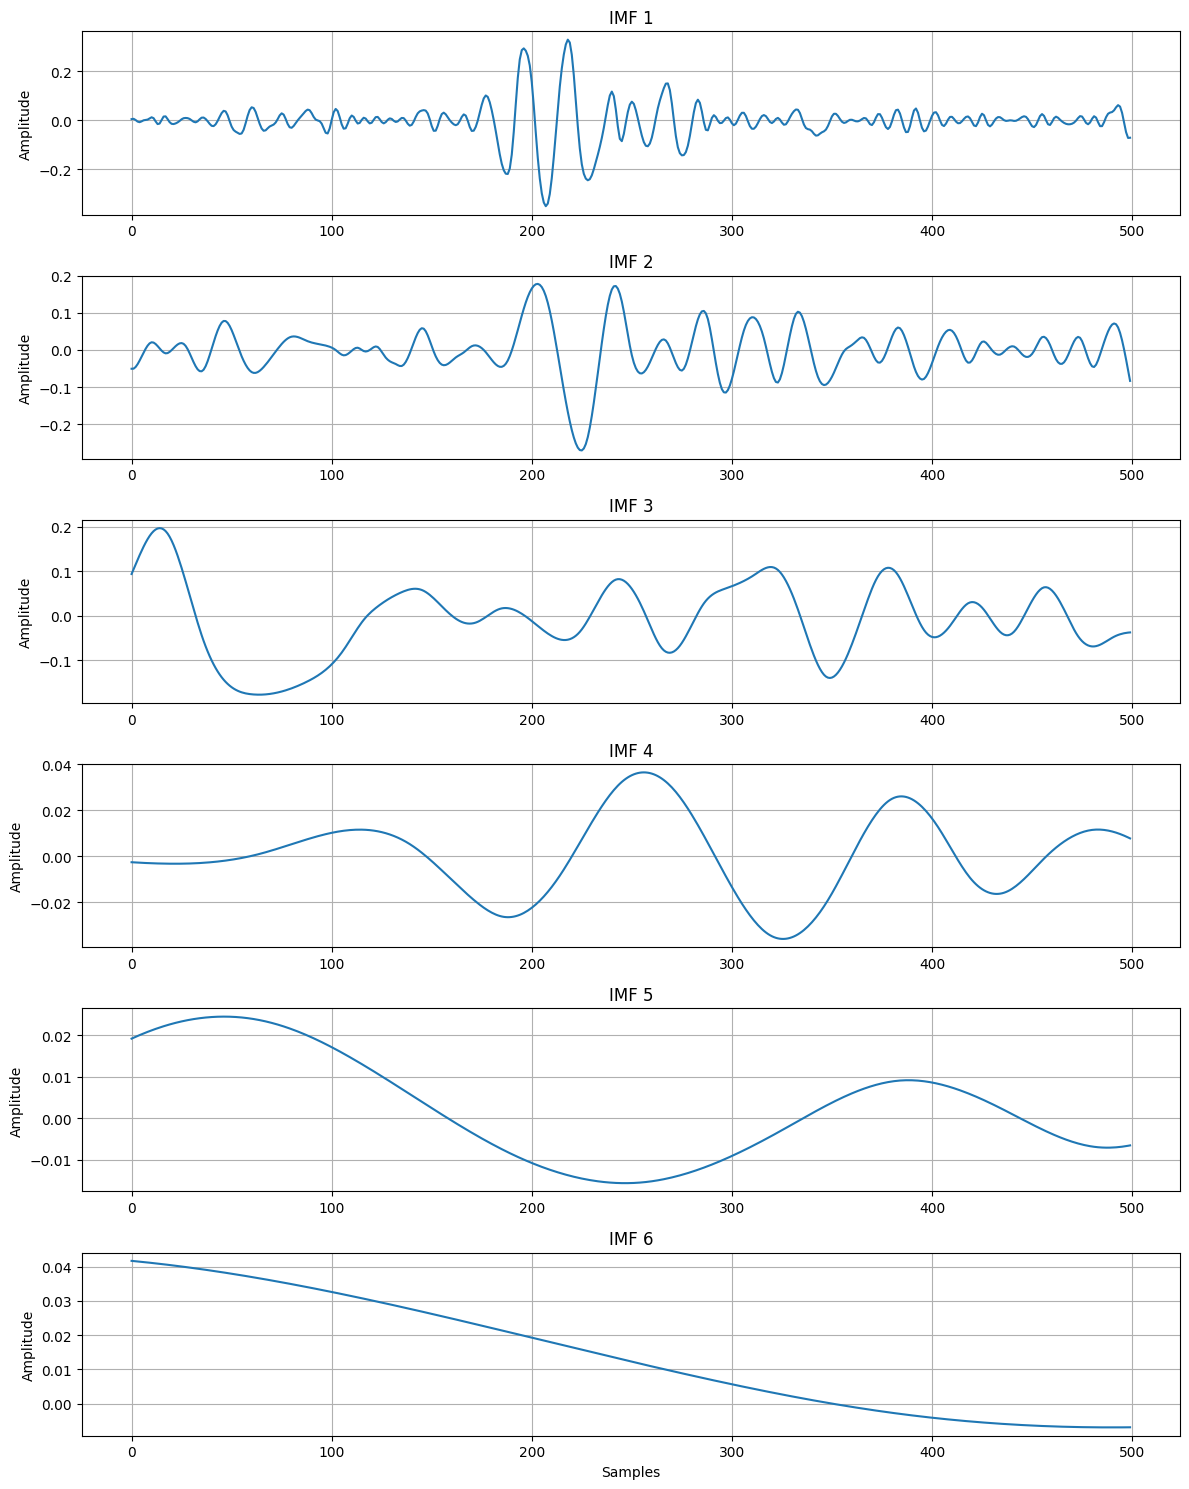

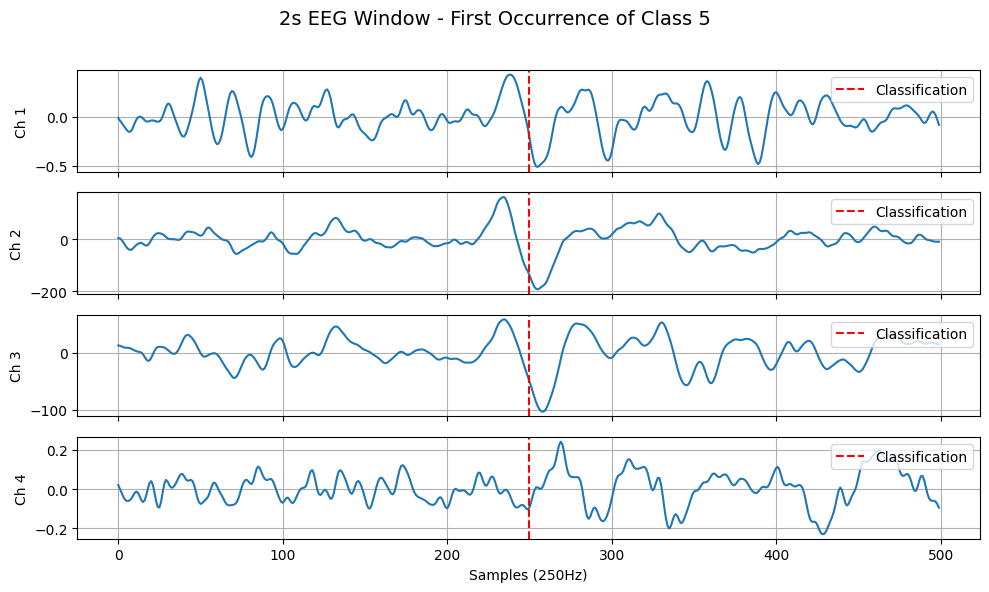

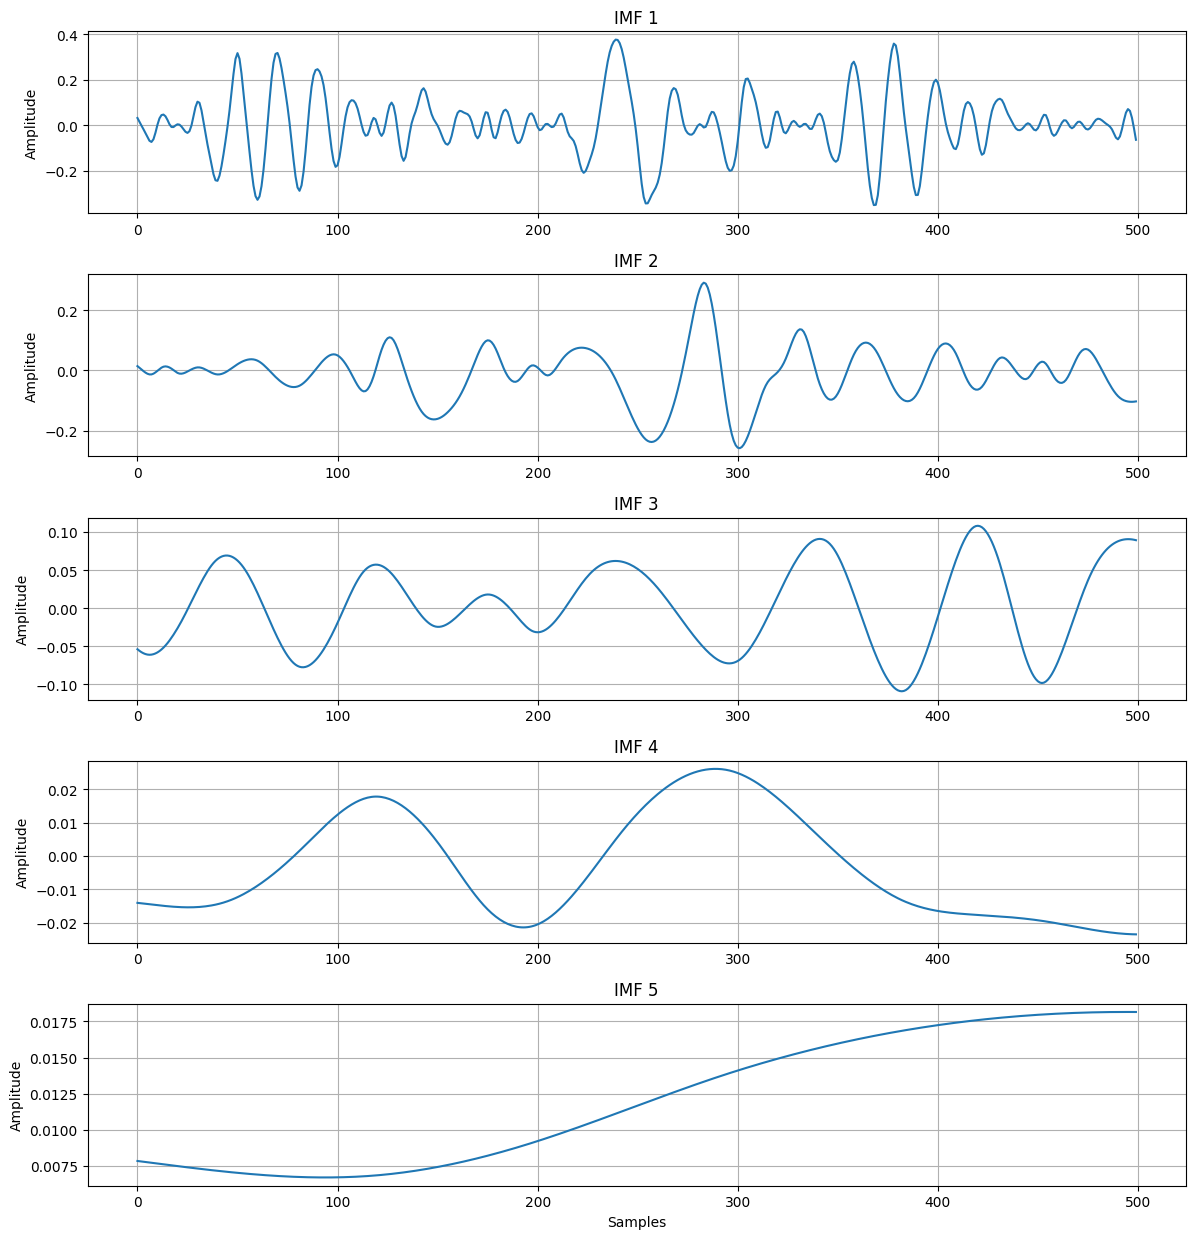

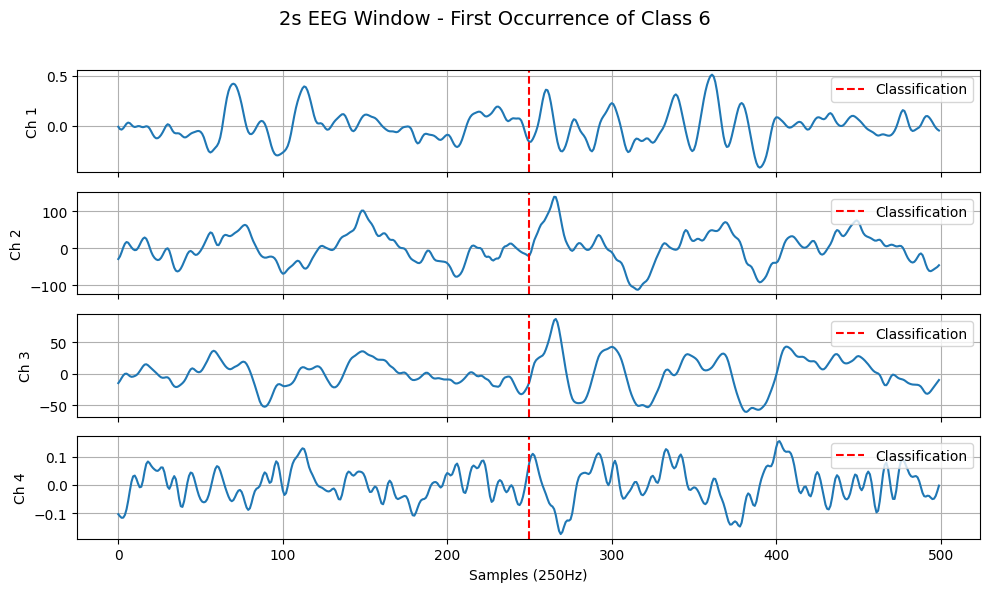

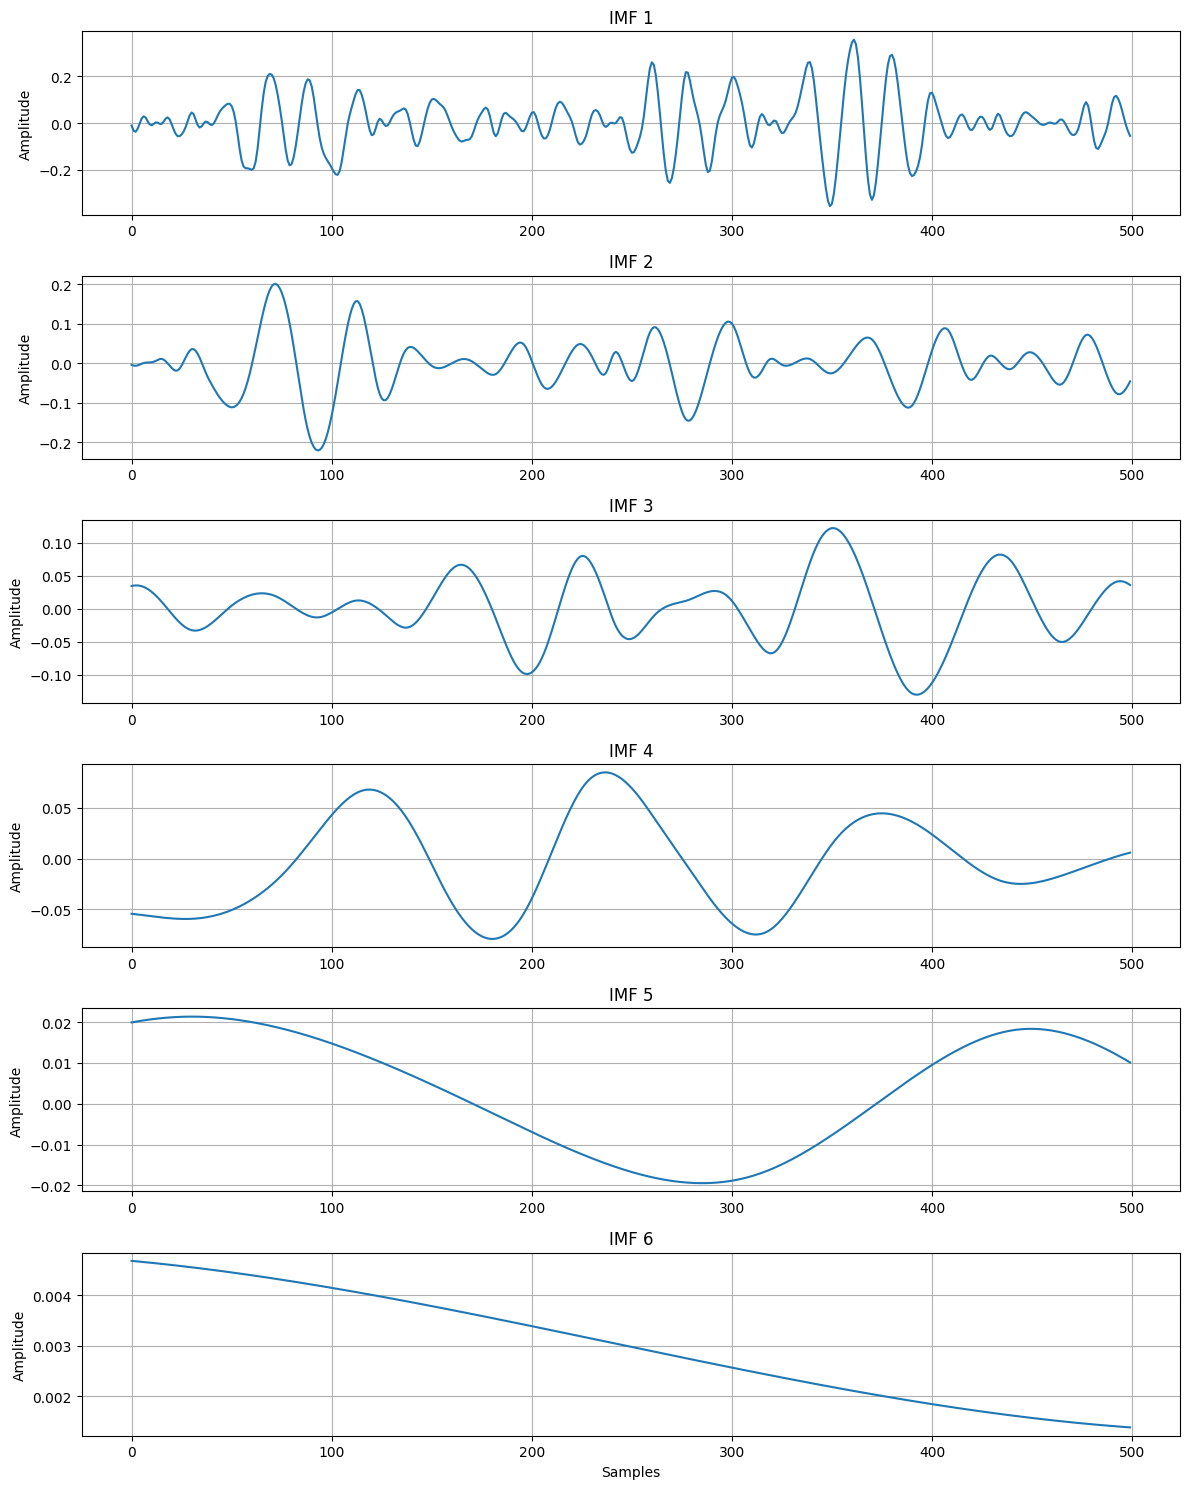

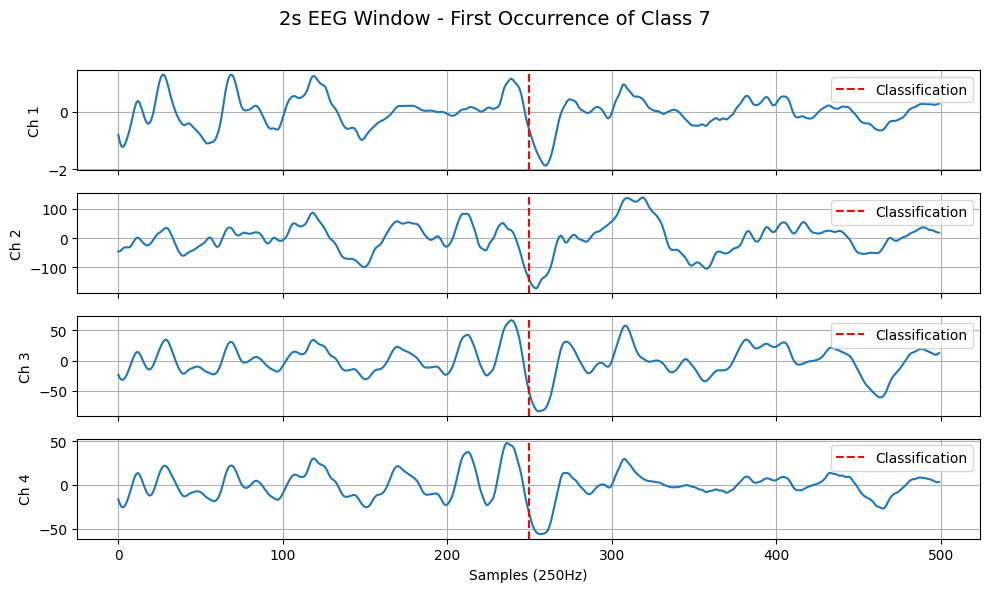

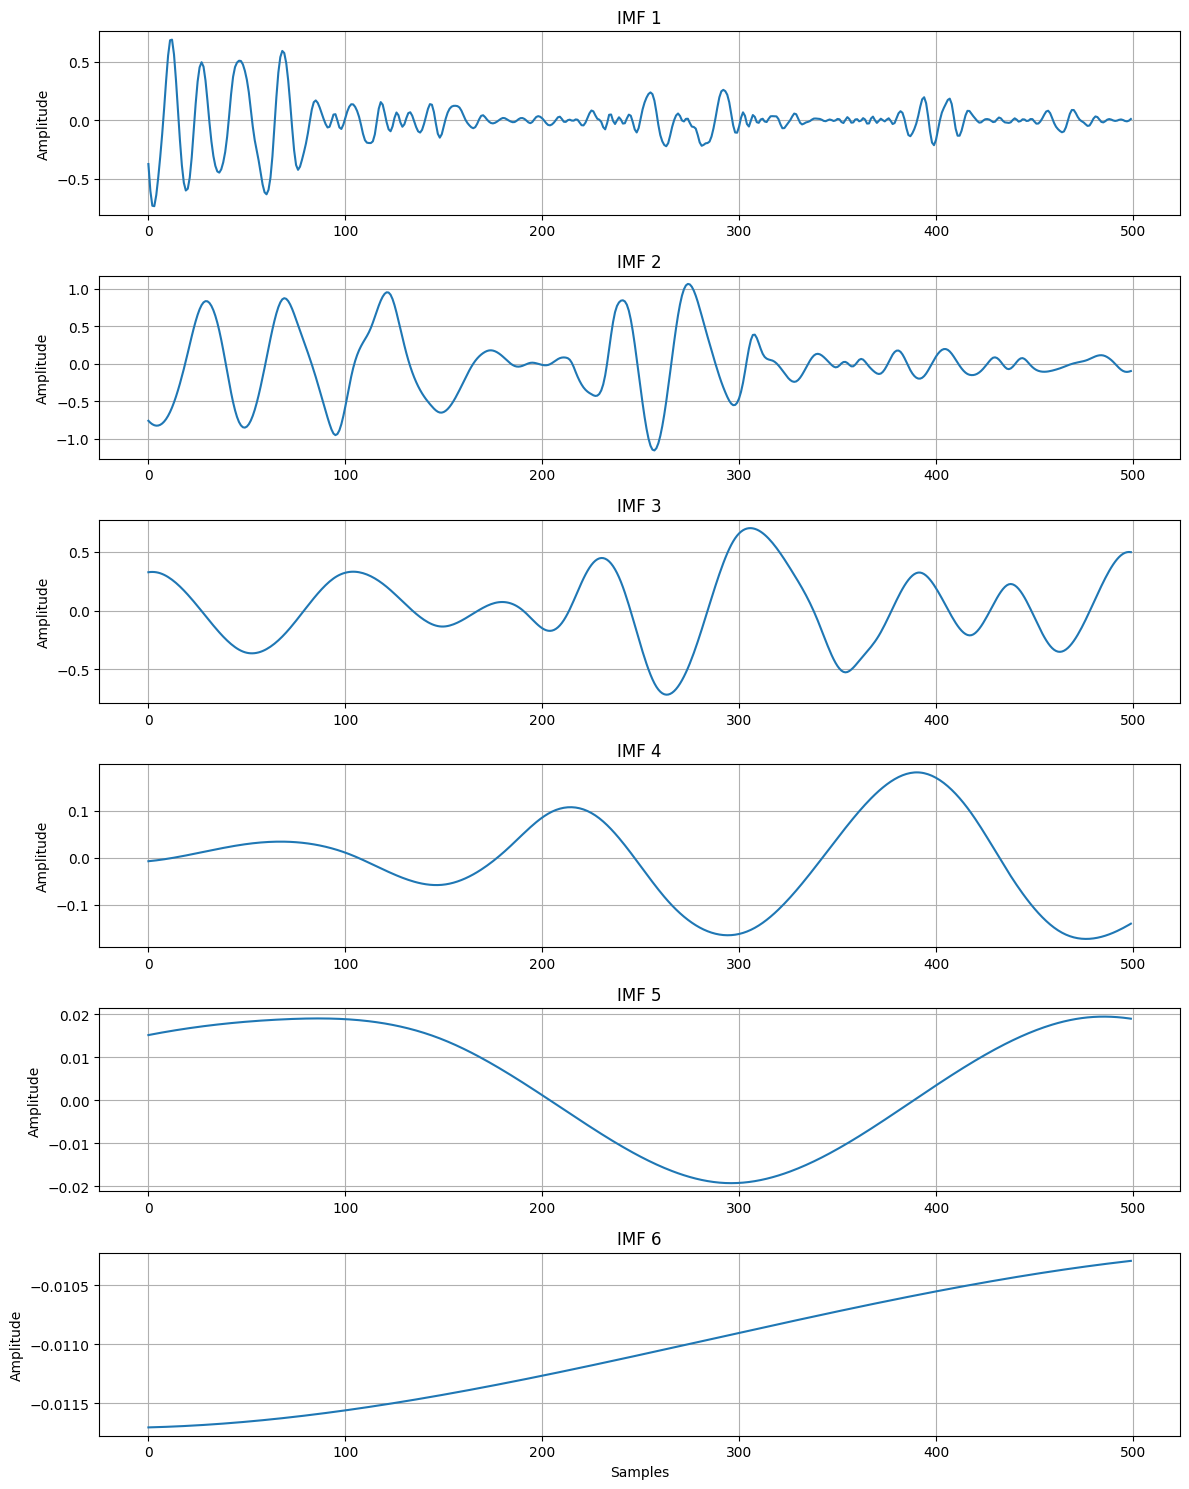

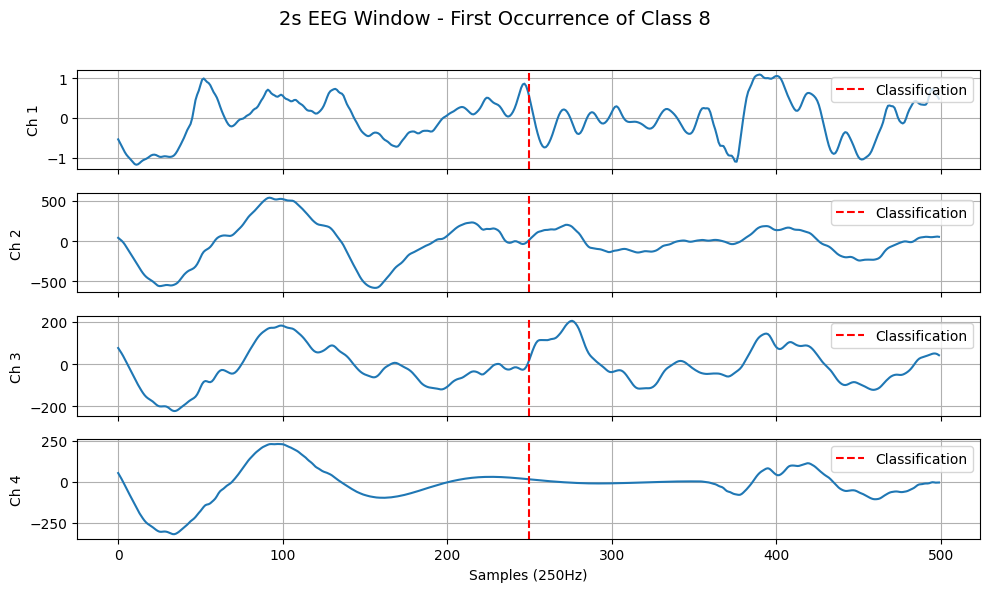

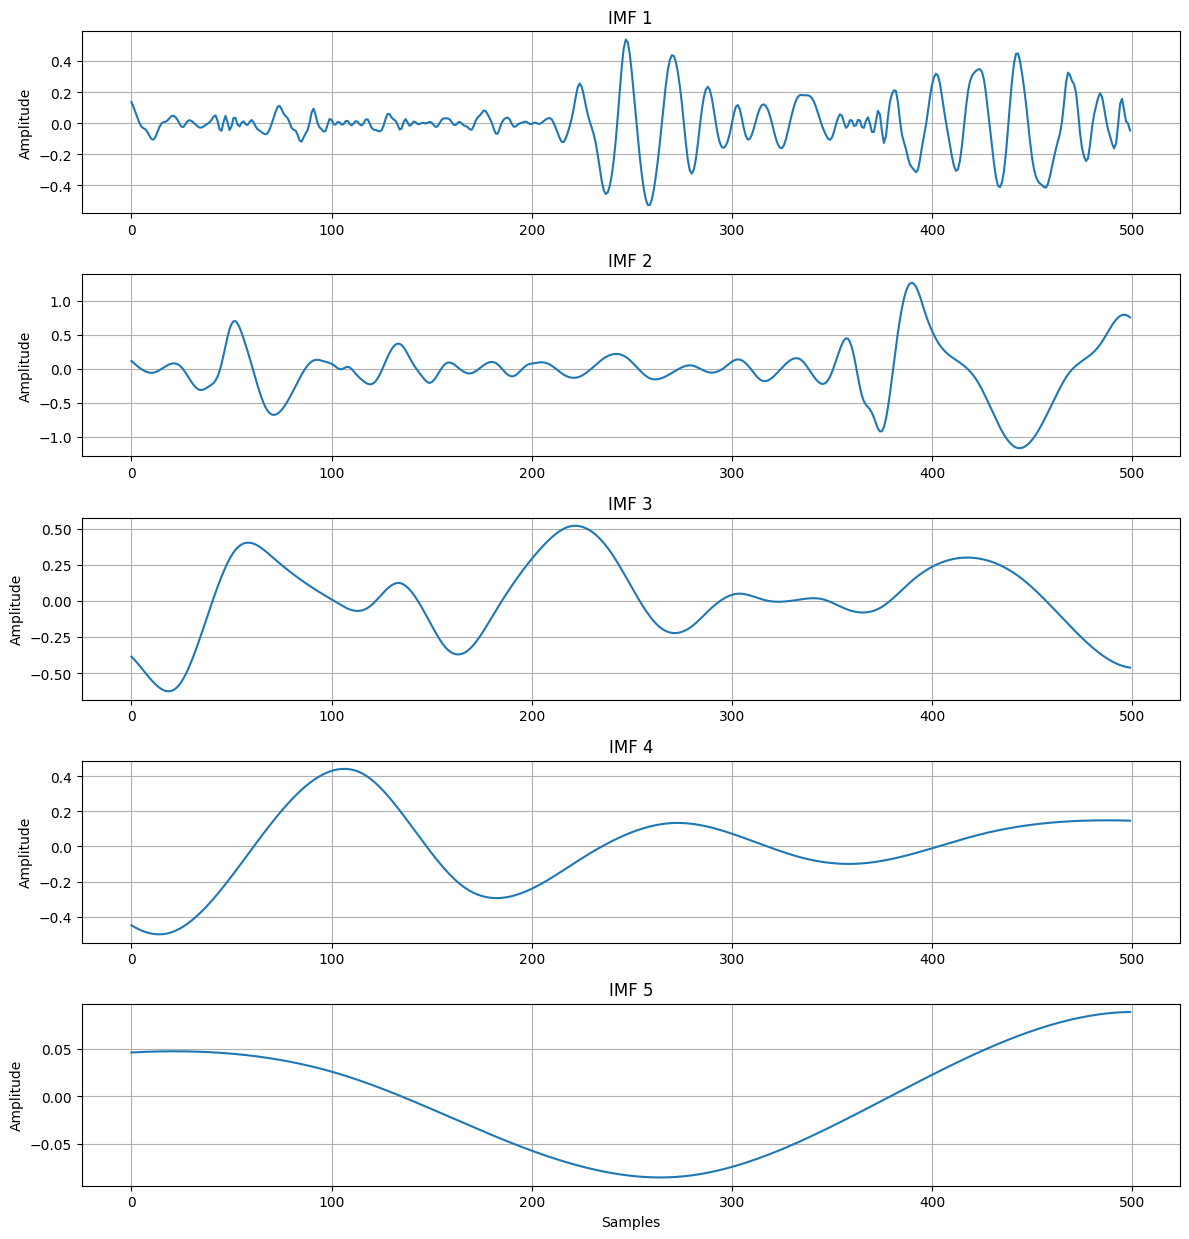

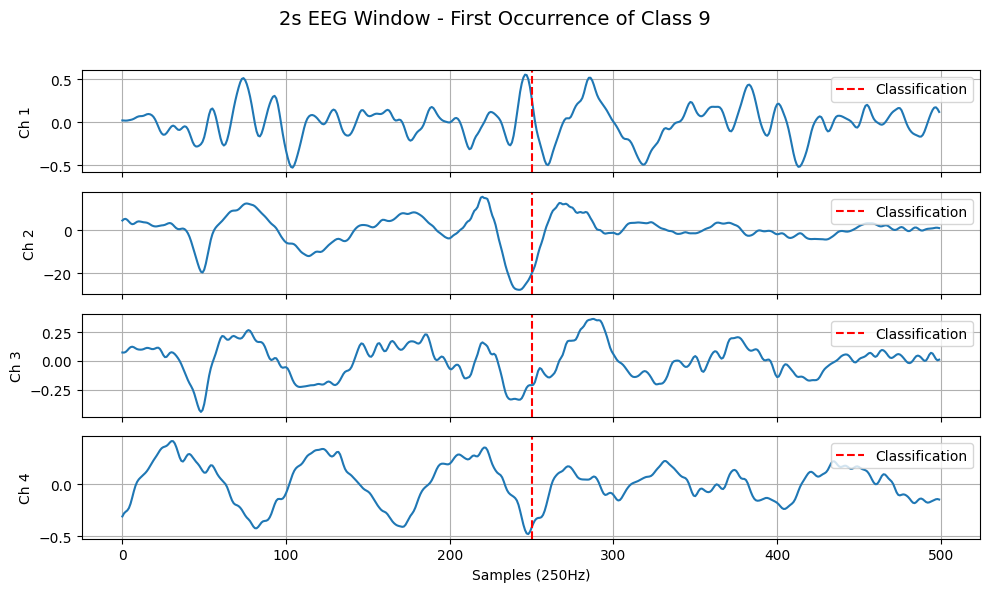

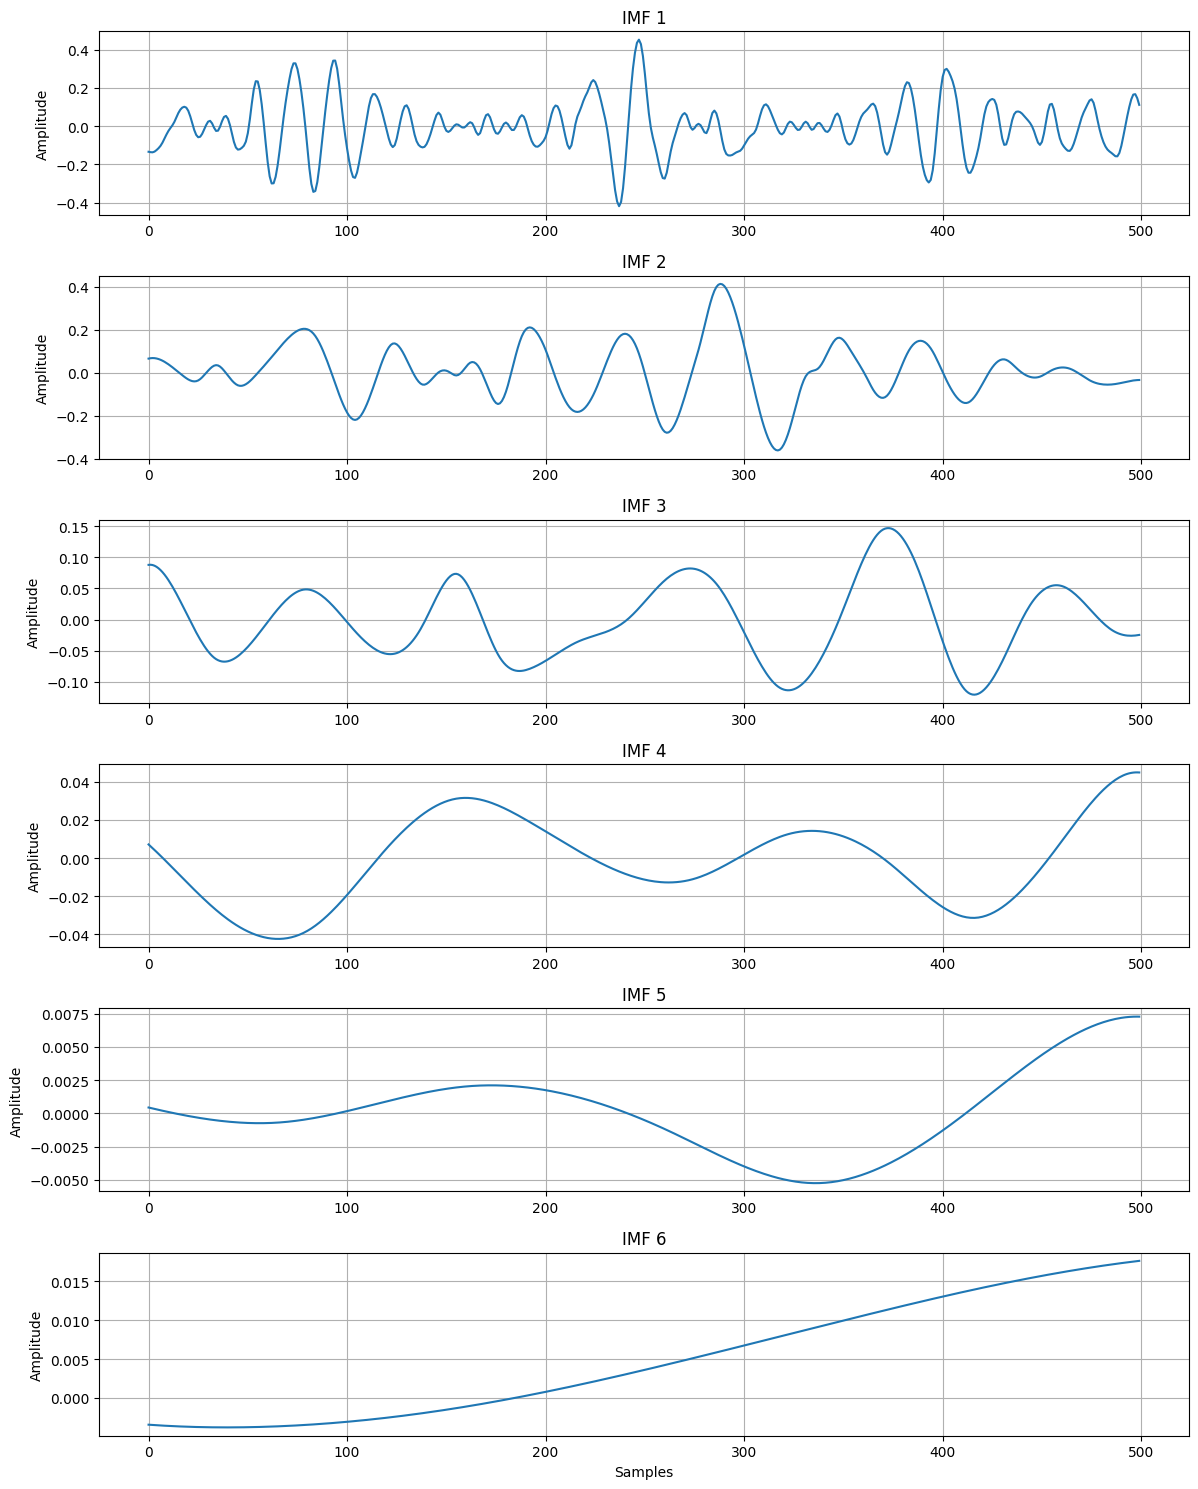

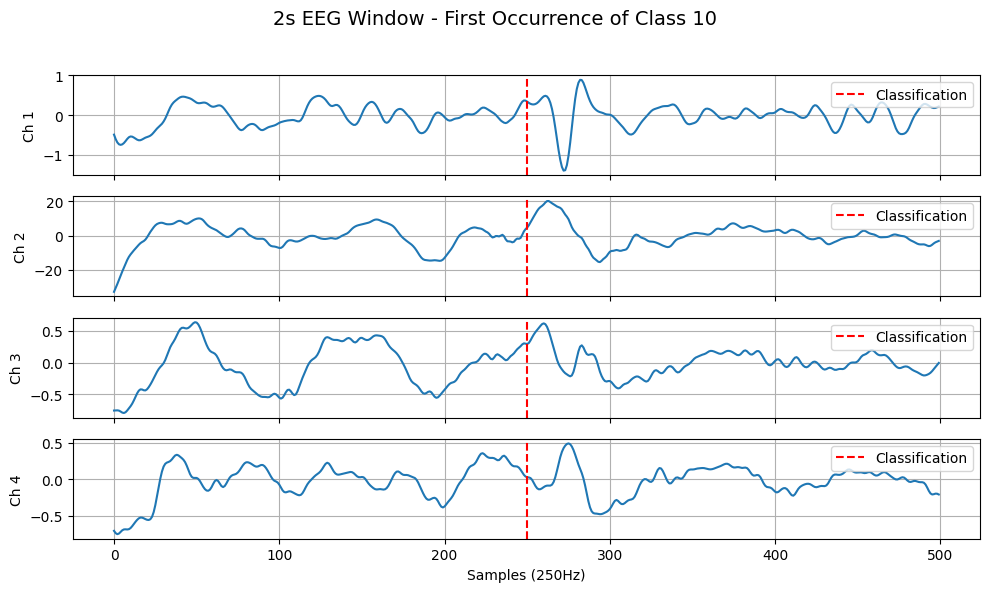

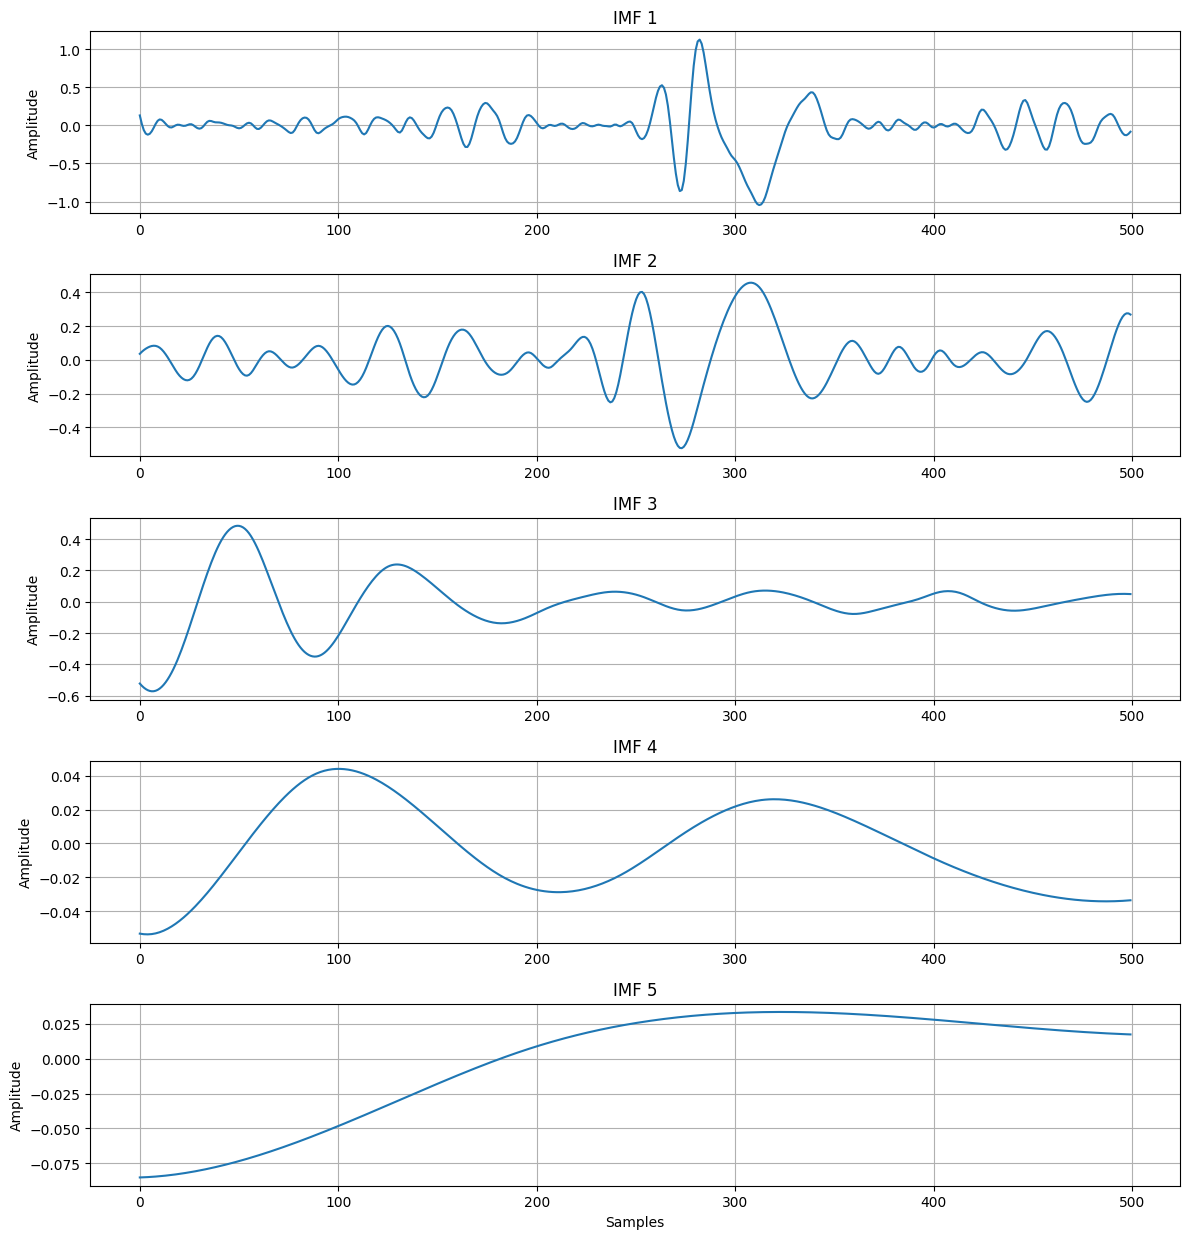

In [12]:
# Load files
classification_path = "TrainingData/training_data.csv"
data_path = "TrainingData/combined_data.csv"

classification = pd.read_csv(classification_path).values.astype(np.int64)
data = pd.read_csv(data_path).values.astype(np.float32)

# EEG & class info
channel_data = data[:, :4]
classifications_list = [0,1,2,3,4,5,6,7,8,9,10]

# Settings
sampling_rate = 250
window_size = sampling_rate * 2  # 2 seconds
half_window = window_size // 2

# Plot each class
for class_id in classifications_list:
    matches = classification[classification[:, 0] == class_id]
    if len(matches) == 0:
        print(f"Class {class_id} not found in classification data.")
        continue

    center_idx = matches[12, 1]
    start = max(0, center_idx - half_window)
    end = min(len(data), center_idx + half_window)
    window = channel_data[start:end]
    

    
    #max_abs = np.max(np.abs(window))
    #window = window / max_abs if max_abs != 0 else window

    # Plot
    fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    fig.suptitle(f"2s EEG Window - First Occurrence of Class {class_id}", fontsize=14)

    for ch in range(4):
        axes[ch].plot(window[:, ch], color='tab:blue')
        axes[ch].axvline(x=half_window, color='red', linestyle='--', label='Classification')  # vertical line
        axes[ch].set_ylabel(f"Ch {ch+1}")
        axes[ch].grid(True)
        axes[ch].legend(loc="upper right")

    axes[-1].set_xlabel("Samples (250Hz)")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Apply EMD
    emd = EMD()
    imfs = emd(window[:,1])  # Shape: (n_imfs, signal_length)

    # Plot IMFs
    n_imfs = imfs.shape[0]
    plt.figure(figsize=(12, 2.5 * n_imfs))

    for i in range(n_imfs):
        plt.subplot(n_imfs, 1, i + 1)
        plt.plot(imfs[i], color='tab:blue')
        plt.title(f"IMF {i + 1}")
        plt.ylabel("Amplitude")
        plt.grid(True)

    plt.xlabel("Samples")
    plt.tight_layout()
    plt.show()
    

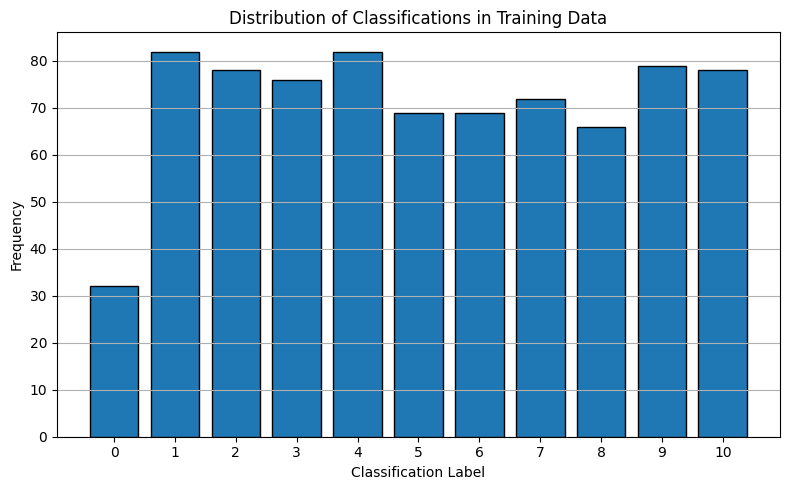

In [3]:
# Plot each class
# Load classification data
classification_path = "TrainingData/training_data.csv"
classification = pd.read_csv(classification_path).values.astype(np.int64)

# Extract class labels from the first column
class_labels = classification[:, 0]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(class_labels, bins=np.arange(12) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(11))
plt.xlabel("Classification Label")
plt.ylabel("Frequency")
plt.title("Distribution of Classifications in Training Data")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

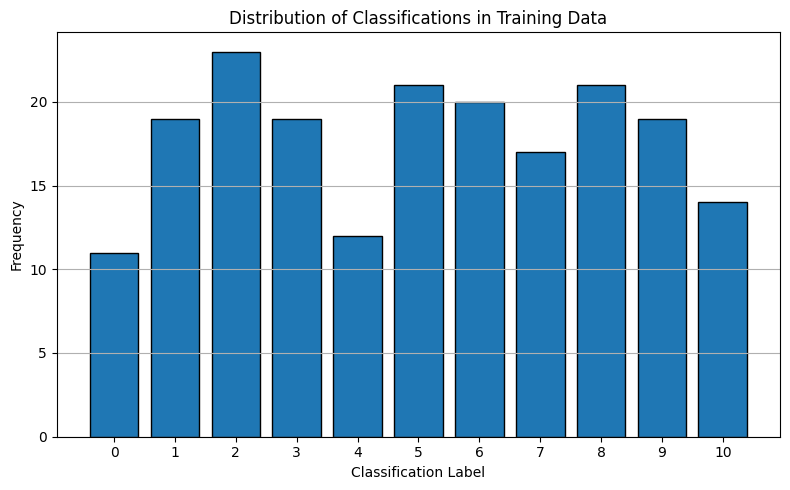

In [4]:
classification_path = "TrainingData/testing_data.csv"
classification = pd.read_csv(classification_path).values.astype(np.int64)

# Extract class labels from the first column
class_labels = classification[:, 0]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(class_labels, bins=np.arange(12) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(11))
plt.xlabel("Classification Label")
plt.ylabel("Frequency")
plt.title("Distribution of Classifications in Training Data")
plt.grid(axis='y')
plt.tight_layout()
plt.show()